# Synteny analysis

This is to perform synteny analysis between gillenia and apple/pear/peach.

## Background
* Gillenia genome size ~270MB, 9 chrs. (Avg chr length ~30MB, but we know the chrs are usually with variant length)
* Malus GDDH genome size ~657MB in 17 chrs. The shortest and longest chrs are about 31.6MB and 54.9MB
* Pyrus communis DH v2 assembled ~446.5MB in 17 chrs, with length from 20.9MB to 39.2MB
* Gillenia is ancestral to apple, peach another clade.
* When are we in the position to compare Gillenia with ancestral rosaceae genomes example by Zhang et al 2012 "The genome of Prunus mume" Fig 3?

In [2]:
GENOME_PATH=/output/genomic/plant/Gillenia/trifoliata/Synteny
APPLE_ASSEMBLY=HFTH1.all.chr.fa
PEAR_ASSEMBLY=PyrusCommunis_BartlettDHv2.0.fasta
PEACH_ASSEMBLY=Prunus_persica_v2.0.a1_scaffolds.fasta

In [3]:
SCAFFOLDS_LINKS=/workspace/hraczw/github/GA/Gillenia_genome/005.GapFilling/scaffolds_links_i6_gapClosed.nobacteria.fasta
SCAFFOLDS_SLR=/workspace/hraczw/github/GA/Gillenia_genome/005.GapFilling/scaffolds_slr_gapClosed.nobacteria.fasta
SCAFFOLDS_LINKS_I8_FILL=/workspace/hraczw/github/GA/Gillenia_genome/005.GapFilling/scaff_links_i8_gapFilled.tgs-gapcloser.scaff_seqs
SCAFFOLDS_763=/workspace/hraczw/github/GA/Gillenia_genome/005.GapFilling/scaff_links_i10_gapFilled.noCorrection.tgs-gapcloser.scaff_seqs.nobacteria.ml10000.fasta
CTG_CHR=/workspace/hrpazs/Gillenia_genome/G3-2-S4.2KB_Chr.fasta
RAGOO_CHR_V1=/workspace/hraczw/github/GA/Gillenia_genome/014.chr/Chrs_gillenia.fasta
RAGOO_CHR_V1_REVCOMPL=/workspace/hraczw/github/GA/Gillenia_genome/014.chr/Chrs_gillenia_revcompl.fasta
RAGOO_CHR_V2=/workspace/hraczw/github/GA/Gillenia_genome/014.chr/test_chrs/test_chrs.fasta
RAGOO_CHR_V3=/workspace/hraczw/github/GA/Gillenia_genome/014.chr/test_chrs_revcomp/test_revcomp_rename_chrs.fasta
RAGOO_SCAFF=/workspace/hraczw/github/GA/Gillenia_genome/005.GapFilling/scaff_ragoo_gapfilled_noContamination.fasta
RAGOO_SCAFF_REV=/workspace/hraczw/github/GA/Gillenia_genome/005.GapFilling/scaff_ragoo_gapfilled_noContamination.revcomp.rename.fasta

In [3]:
mkdir 006.SyntenyAnalysis

In [4]:
WORKDIR=006.SyntenyAnalysis

## 1. Mapping

### contig chr vs ragoo chr v2

In [15]:
bsub -J nucmer \
-m wkoppb50 \
-n 40 \
-o $WORKDIR/nucmer_ctg_chr_vs_ragoo_chr_v2.out \
-e $WORKDIR/nucmer_ctg_chr_vs_ragoo_chr_v2.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=chr_compare \
-t 40 \
$RAGOO_CHR_V2 $CTG_CHR"

Job <294975> is submitted to default queue <lowpriority>.


### apple

In [12]:
bsub -J nucmer \
-m wkoppb50 \
-n 20 \
-o $WORKDIR/nucmer_links.out \
-e $WORKDIR/nucmer_links.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=scaffolds_links \
-t 20 \
$GENOME_PATH/$APPLE_ASSEMBLY $SCAFFOLDS_LINKS"

Job <294972> is submitted to default queue <lowpriority>.


In [13]:
bsub -J nucmer \
-m wkoppb39 \
-n 10 \
-o $WORKDIR/nucmer_slr.out \
-e $WORKDIR/nucmer_slr.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=scaffolds_slr \
-t 10 \
$GENOME_PATH/$APPLE_ASSEMBLY $SCAFFOLDS_SLR"

Too many processors requested. Job not submitted.


: 255

In [5]:
bsub -J nucmer \
-m wkoppb39 \
-n 40 \
-o $WORKDIR/nucmer_links_i8_fill.out \
-e $WORKDIR/nucmer_links_i8_fill.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=scaffolds_links_i8_fill \
-t 40 \
$GENOME_PATH/$APPLE_ASSEMBLY $SCAFFOLDS_LINKS_I8_FILL"

Job <231949> is submitted to default queue <lowpriority>.


In [22]:
bsub -J nucmer \
-m wkoppb39 \
-n 40 \
-o $WORKDIR/nucmer_links_763.out \
-e $WORKDIR/nucmer_links_763.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=scaffolds_763 \
-t 40 \
$GENOME_PATH/$APPLE_ASSEMBLY $SCAFFOLDS_763"

Job <232234> is submitted to default queue <lowpriority>.


In [4]:
bsub -J nucmer \
-m wkoppb50 \
-n 20 \
-o $WORKDIR/nucmer_contig_chrs.out \
-e $WORKDIR/nucmer_contig_chrs.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=contig_chrs \
-t 20 \
$GENOME_PATH/$APPLE_ASSEMBLY $CTG_CHR"

Job <255531> is submitted to default queue <lowpriority>.


In [4]:
bsub -J nucmer \
-m wkoppb50 \
-n 20 \
-o $WORKDIR/nucmer_ragoo_chrs.out \
-e $WORKDIR/nucmer_ragoo_chrs.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=ragoo_chrs \
-t 20 \
$GENOME_PATH/$APPLE_ASSEMBLY $RAGOO_CHR_V1"

Job <269147> is submitted to default queue <lowpriority>.


In [6]:
bsub -J nucmer \
-m wkoppb50 \
-n 20 \
-o $WORKDIR/nucmer_ragoo_chrs_v2.out \
-e $WORKDIR/nucmer_ragoo_chrs_v2.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=ragoo_chrs_v2 \
-t 20 \
$GENOME_PATH/$APPLE_ASSEMBLY $RAGOO_CHR_V2"

Job <294968> is submitted to default queue <lowpriority>.


In [23]:
bsub -J nucmer \
-m wkoppb50 \
-n 20 \
-o $WORKDIR/nucmer_ragoo_chrs_v3.out \
-e $WORKDIR/nucmer_ragoo_chrs_v3.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=ragoo_chrs_v3 \
-t 20 \
$GENOME_PATH/$APPLE_ASSEMBLY $RAGOO_CHR_V3"

Job <295046> is submitted to default queue <lowpriority>.


In [29]:
bsub -J nucmer \
-m wkoppb50 \
-n 20 \
-o $WORKDIR/nucmer_ragoo_chrs_v1_revcompl.out \
-e $WORKDIR/nucmer_ragoo_chrs_v1_revcompl.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=ragoo_chrs_revcompl \
-t 20 \
$GENOME_PATH/$APPLE_ASSEMBLY $RAGOO_CHR_V1_REVCOMPL"

Job <295049> is submitted to default queue <lowpriority>.


In [39]:
bsub -J nucmer \
-m wkoppb50 \
-n 20 \
-o $WORKDIR/nucmer_ragoo_scaff_rev.out \
-e $WORKDIR/nucmer_ragoo_scaff_rev.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=ragoo_scaff_rev \
-t 20 \
$GENOME_PATH/$APPLE_ASSEMBLY $RAGOO_SCAFF_REV"

Job <297530> is submitted to default queue <lowpriority>.


In [40]:
mv *delta 006.SyntenyAnalysis

### pear

In [25]:
bsub -J nucmer \
-m wkoppb39 \
-n 10 \
-o $WORKDIR/nucmer_links.pear.out \
-e $WORKDIR/nucmer_links.pear.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=scaffolds_links.pear \
-t 10 \
$GENOME_PATH/$PEAR_ASSEMBLY $SCAFFOLDS_LINKS"

Job <764390> is submitted to default queue <lowpriority>.


In [26]:
bsub -J nucmer \
-m wkoppb39 \
-n 10 \
-o $WORKDIR/nucmer_slr.pear.out \
-e $WORKDIR/nucmer_slr.pear.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=scaffolds_slr.pear \
-t 10 \
$GENOME_PATH/$PEAR_ASSEMBLY $SCAFFOLDS_SLR"

Job <764391> is submitted to default queue <lowpriority>.


### peach

In [28]:
bsub -J nucmer \
-m wkoppb39 \
-n 10 \
-o $WORKDIR/nucmer_links.peach.out \
-e $WORKDIR/nucmer_links.peach.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=scaffolds_links.peach \
-t 10 \
$GENOME_PATH/$PEACH_ASSEMBLY $SCAFFOLDS_LINKS"

Job <764393> is submitted to default queue <lowpriority>.


In [27]:
bsub -J nucmer \
-m wkoppb39 \
-n 10 \
-o $WORKDIR/nucmer_slr.peach.out \
-e $WORKDIR/nucmer_slr.peach.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/nucmer \
--mum \
--prefix=scaffolds_slr.peach \
-t 10 \
$GENOME_PATH/$PEACH_ASSEMBLY $SCAFFOLDS_SLR"

Job <764392> is submitted to default queue <lowpriority>.


## 2. filter based on identity and length

### Apple

identity: 80
length: 10k

In [12]:
bsub -J filter \
-o $WORKDIR/filter_links.out \
-e $WORKDIR/filter_links.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 80 \
-l 10000 \
-m \
$WORKDIR/scaffolds_links.delta > $WORKDIR/scaffolds_links.i80.l10k.delta"

Job <764374> is submitted to default queue <lowpriority>.


In [13]:
bsub -J filter \
-o $WORKDIR/filter_slr.out \
-e $WORKDIR/filter_slr.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 80 \
-l 10000 \
-m \
$WORKDIR/scaffolds_slr.delta > $WORKDIR/scaffolds_slr.i80.l10k.delta"

Job <764375> is submitted to default queue <lowpriority>.


identity: 70
length: 5k

In [17]:
bsub -J filter \
-o $WORKDIR/filter_links.i70.l5k.out \
-e $WORKDIR/filter_links.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 5000 \
-m \
$WORKDIR/scaffolds_links.delta > $WORKDIR/scaffolds_links.i70.l5k.delta"

Job <764382> is submitted to default queue <lowpriority>.


In [18]:
bsub -J filter \
-o $WORKDIR/filter_slr.i70.l5k.out \
-e $WORKDIR/filter_slr.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 5000 \
-m \
$WORKDIR/scaffolds_slr.delta > $WORKDIR/scaffolds_slr.i70.l5k.delta"

Job <764383> is submitted to default queue <lowpriority>.


identity: 70
length: 10k

In [21]:
bsub -J filter \
-o $WORKDIR/filter_links.i70.l10k.out \
-e $WORKDIR/filter_links.i70.l10k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 10000 \
-m \
$WORKDIR/scaffolds_links.delta > $WORKDIR/scaffolds_links.i70.l10k.delta"

Job <764386> is submitted to default queue <lowpriority>.


In [22]:
bsub -J filter \
-o $WORKDIR/filter_slr.i70.l10k.out \
-e $WORKDIR/filter_slr.i70.l10k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 10000 \
-m \
$WORKDIR/scaffolds_slr.delta > $WORKDIR/scaffolds_slr.i70.l10k.delta"

Job <764387> is submitted to default queue <lowpriority>.


In [5]:
bsub -J filter \
-o $WORKDIR/filter_contig_chrs.i70.l10k.out \
-e $WORKDIR/filter_contig_chrs.i70.l10k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 10000 \
-m \
$WORKDIR/contig_chrs.delta > $WORKDIR/contig_chrs.i70.l10k.delta"

Job <255532> is submitted to default queue <lowpriority>.


In [5]:
bsub -J filter \
-o $WORKDIR/filter_ragoo_chrs.i70.l5k.out \
-e $WORKDIR/filter_ragoo_chrs.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 5000 \
-m \
$WORKDIR/ragoo_chrs.delta > $WORKDIR/ragoo_chrs.i70.l5k.delta"

Job <269212> is submitted to default queue <lowpriority>.


In [31]:
bsub -J filter \
-o $WORKDIR/filter_ragoo_chrs_revcompl.i70.l5k.out \
-e $WORKDIR/filter_ragoo_chrs_revcompl.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 5000 \
-m \
$WORKDIR/ragoo_chrs_revcompl.delta > $WORKDIR/ragoo_chrs_revcompl.i70.l5k.delta"

Job <295050> is submitted to default queue <lowpriority>.


In [25]:
bsub -J filter \
-o $WORKDIR/filter_ragoo_chrs_v3.i70.l5k.out \
-e $WORKDIR/filter_ragoo_chrs_v3.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 5000 \
-m \
$WORKDIR/ragoo_chrs_v3.delta > $WORKDIR/ragoo_chrs_v3.i70.l5k.delta"

Job <295047> is submitted to default queue <lowpriority>.


In [ ]:
bsub -J filter \
-o $WORKDIR/filter_ragoo_chrs_v2.i70.l5k.out \
-e $WORKDIR/filter_ragoo_chrs_v2.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 5000 \
-m \
$WORKDIR/ragoo_chrs_v2.delta > $WORKDIR/ragoo_chrs_v2.i70.l5k.delta"

In [17]:
bsub -J filter \
-o $WORKDIR/filter_ctg_chr_vs_ragoo_chr_v2.i70.l5k.out \
-e $WORKDIR/filter_ctg_chr_vs_ragoo_chr_v2.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 5000 \
-m \
$WORKDIR/chr_compare.delta > $WORKDIR/chr_compare.i70.l5k.delta"

Job <295015> is submitted to default queue <lowpriority>.


**NOTE**: length 50k is good, but shorter may be more clear?

In [25]:
bsub -J filter \
-o $WORKDIR/filter_763.i70.l5k.out \
-e $WORKDIR/filter_763.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 5000 \
-m \
$WORKDIR/scaffolds_763.delta > $WORKDIR/scaffolds_763.i70.l5k.delta"

Job <232236> is submitted to default queue <lowpriority>.


In [43]:
bsub -J filter \
-o $WORKDIR/filter_ragoo_scaff_rev.i70.l2k.out \
-e $WORKDIR/filter_ragoo_scaff_rev.i70.l2k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 2000 \
-m \
$WORKDIR/ragoo_scaff_rev.delta > $WORKDIR/ragoo_scaff_rev.i70.l2k.delta"

Job <298902> is submitted to default queue <lowpriority>.


### pear

In [50]:
bsub -J filter \
-o $WORKDIR/filter_links.i70.l5k.pear.out \
-e $WORKDIR/filter_links.i70.l5k.pear.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 70 \
-l 5000 \
-m \
$WORKDIR/scaffolds_links.pear.delta > $WORKDIR/scaffolds_links.i70.l5k.pear.delta"

Job <55719> is submitted to default queue <lowpriority>.


**NOTE**: similar identity and length with Apple is good here

### peach

In [42]:
bsub -J filter \
-o $WORKDIR/filter_links.i50.l2k.peach.out \
-e $WORKDIR/filter_links.i50.l2k.peach.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 50 \
-l 2000 \
-m \
$WORKDIR/scaffolds_links.peach.delta > $WORKDIR/scaffolds_links.i50.l2k.peach.delta"

Job <809434> is submitted to default queue <lowpriority>.


In [43]:
bsub -J filter \
-o $WORKDIR/filter_slr.i50.l2k.peach.out \
-e $WORKDIR/filter_slr.i50.l2k.peach.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/delta-filter \
-i 50 \
-l 2000 \
-m \
$WORKDIR/scaffolds_slr.peach.delta > $WORKDIR/scaffolds_slr.i50.l2k.peach.delta"

Job <809435> is submitted to default queue <lowpriority>.


**NOTE**: may be better with reduced identity and shorter length as peach is in anther clade

## generate graphs

### Apple

In [23]:
bsub -J graph \
-o $WORKDIR/graph.i70.l10k.links.out \
-e $WORKDIR/graph.i70.l10k.links.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/scaffolds_links.i70.l10k.delta \
-R $GENOME_PATH/$APPLE_ASSEMBLY \
-Q $SCAFFOLDS_LINKS \
--filter \
--layout \
-p $WORKDIR/scaffolds_links.i70.l10k.graph"

Job <764388> is submitted to default queue <lowpriority>.


In [24]:
bsub -J graph \
-o $WORKDIR/graph.i70.l10k.slr.out \
-e $WORKDIR/graph.i70.l10k.slr.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/scaffolds_slr.i70.l10k.delta \
-R $GENOME_PATH/$APPLE_ASSEMBLY \
-Q $SCAFFOLDS_SLR \
--filter \
--layout \
-p $WORKDIR/scaffolds_slr.i70.l10k.graph"

Job <764389> is submitted to default queue <lowpriority>.


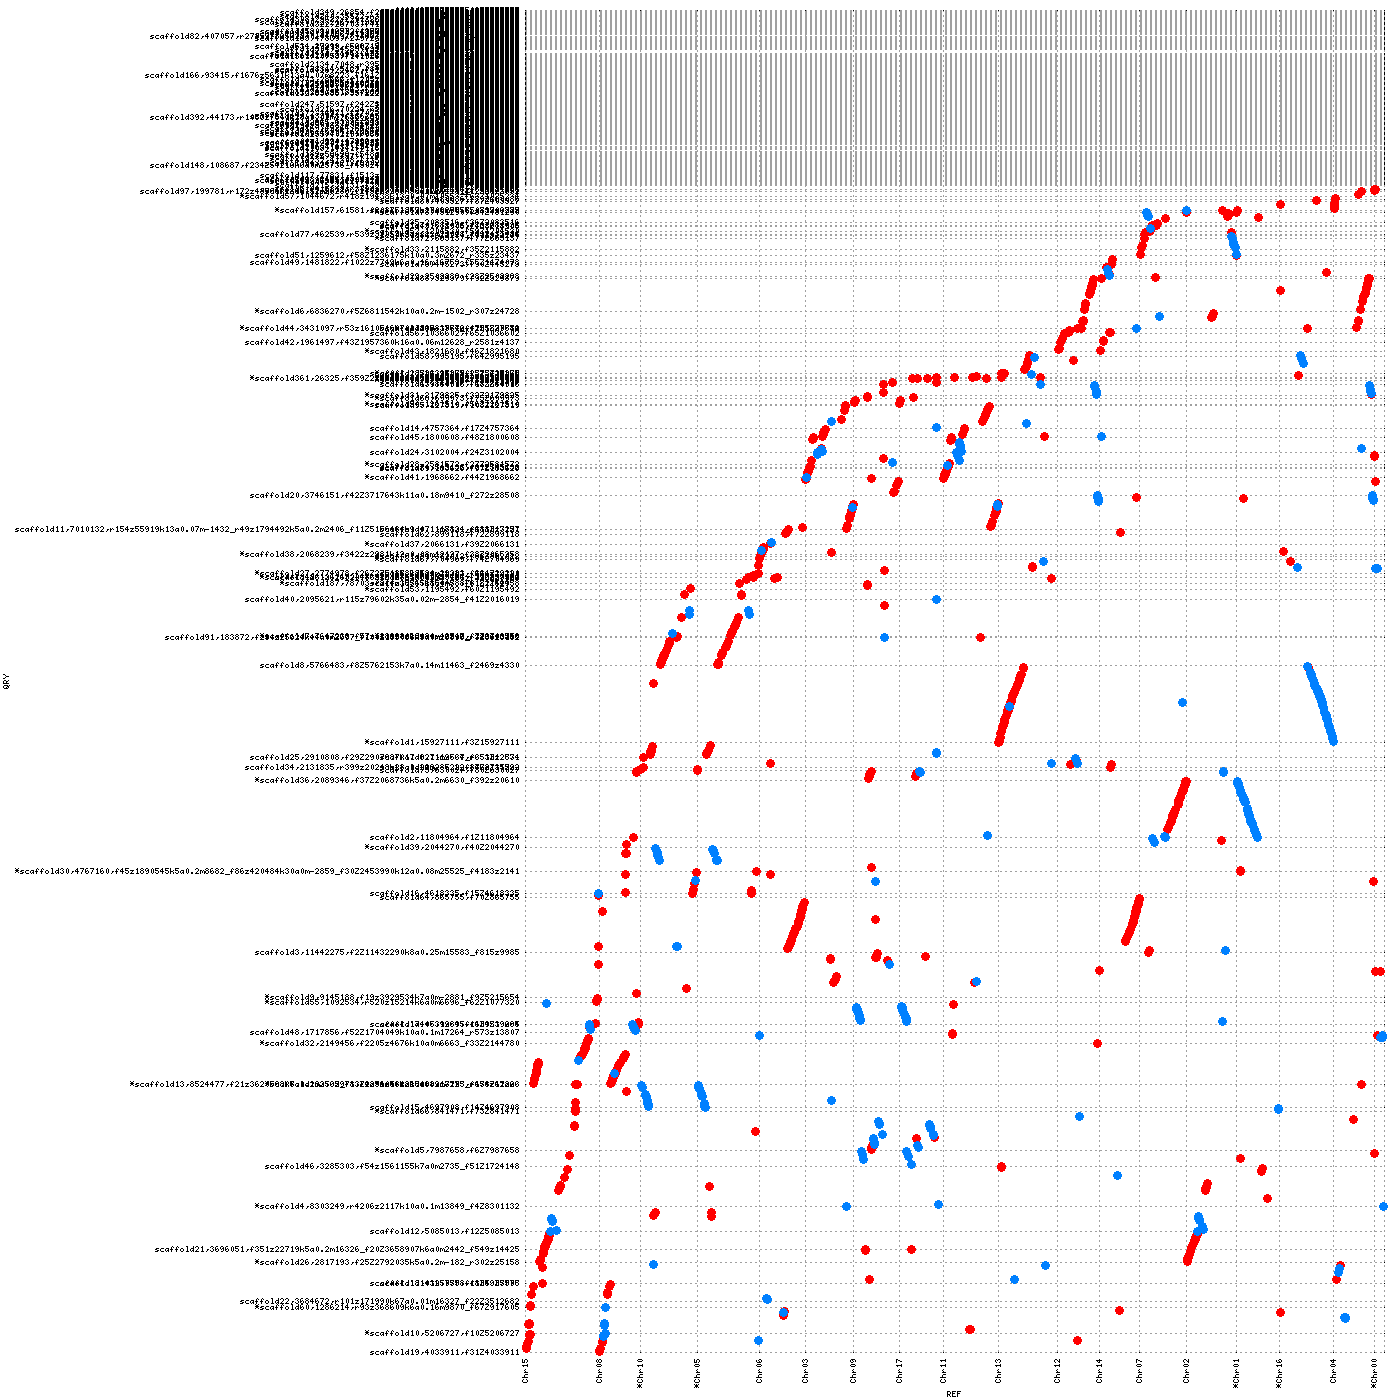

In [6]:
cat $WORKDIR/scaffolds_links.i70.l5k.graph.png | display

* The x is apple chromosomes and y is gillenia scaffolds. It shows chromosomal duplications in apple, examples such as:
    * Chr13 & Chr16
    * Chr07 & Chr01 (SLR didn’t scaffold as good as LINKS on this one)
    * Chr06 & Chr14
* Short scaffolds/contigs sitting up the image didn’t find large synteny with apple, which makes sense.

In [27]:
bsub -J graph \
-o $WORKDIR/graph.i70.l5k.763.out \
-e $WORKDIR/graph.i70.l5k.763.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/scaffolds_763.i70.l5k.delta \
-R $GENOME_PATH/$APPLE_ASSEMBLY \
-Q $SCAFFOLDS_763 \
--filter \
--layout \
-p $WORKDIR/scaffolds_763.i70.l5k.graph"

Job <232238> is submitted to default queue <lowpriority>.


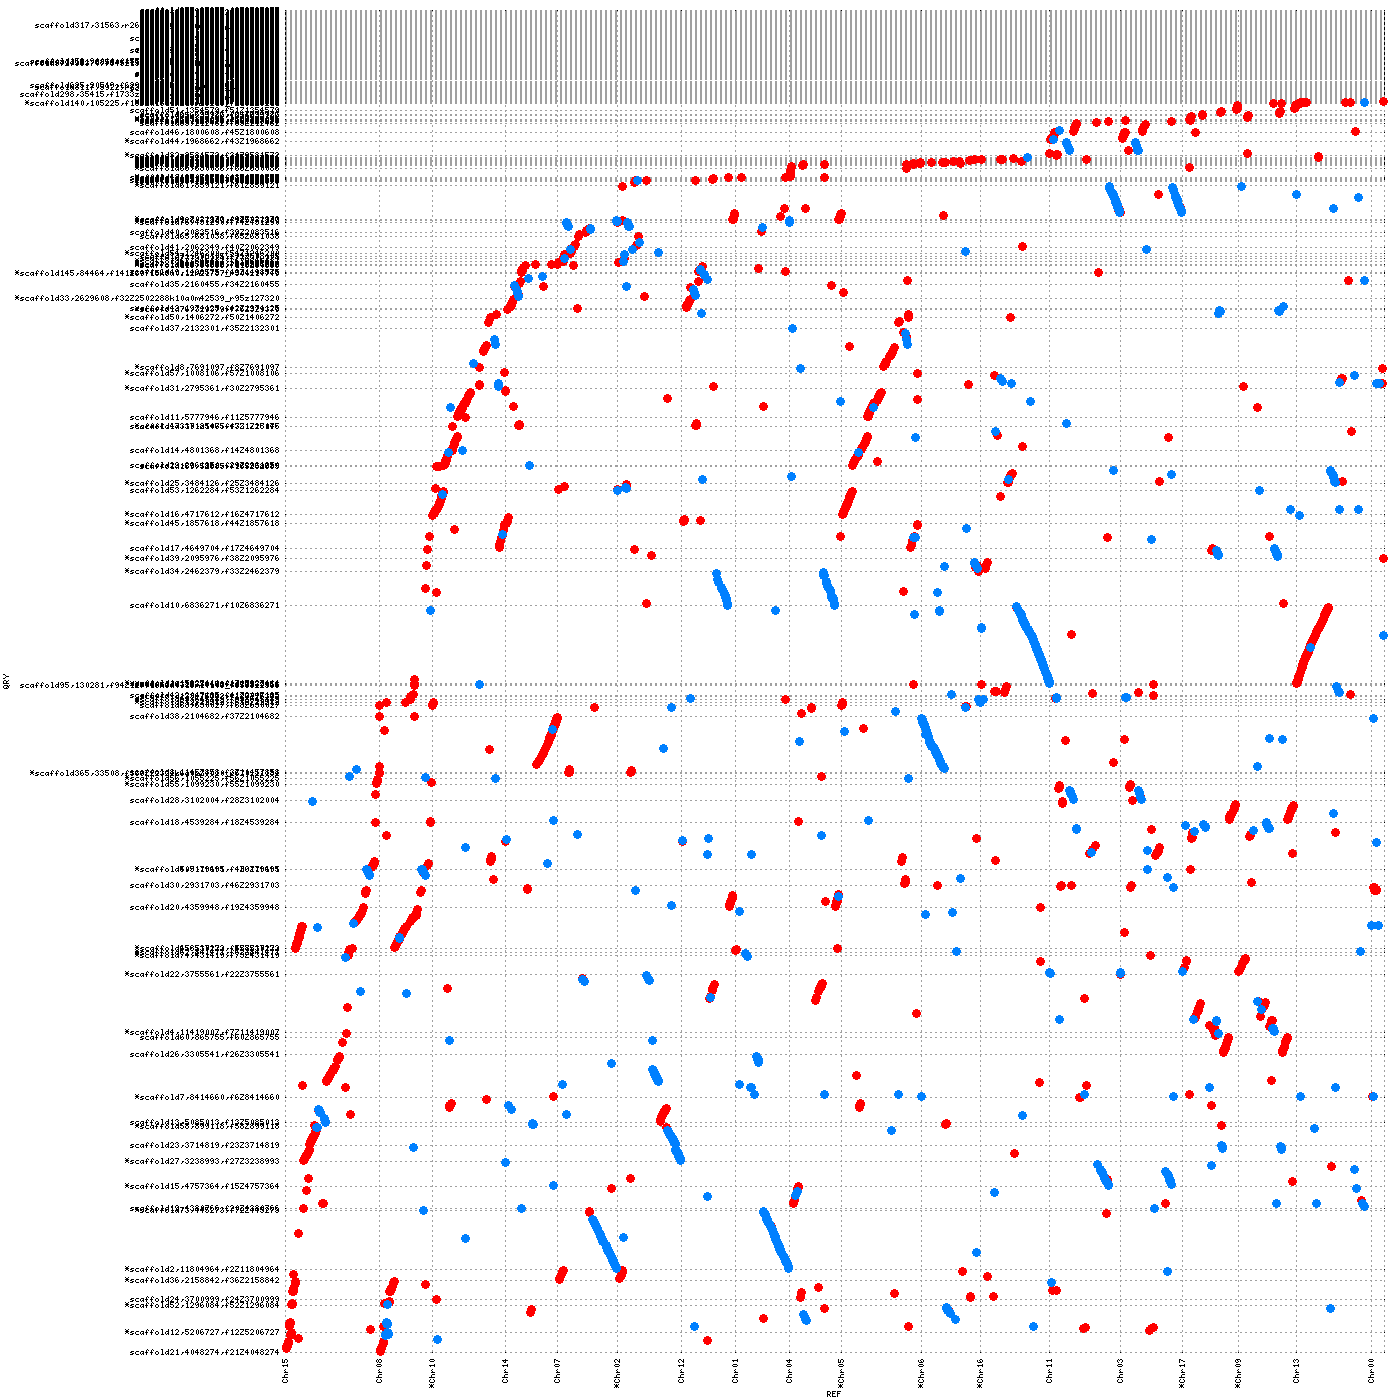

In [28]:
cat $WORKDIR/scaffolds_763.i70.l4k.graph.png | display

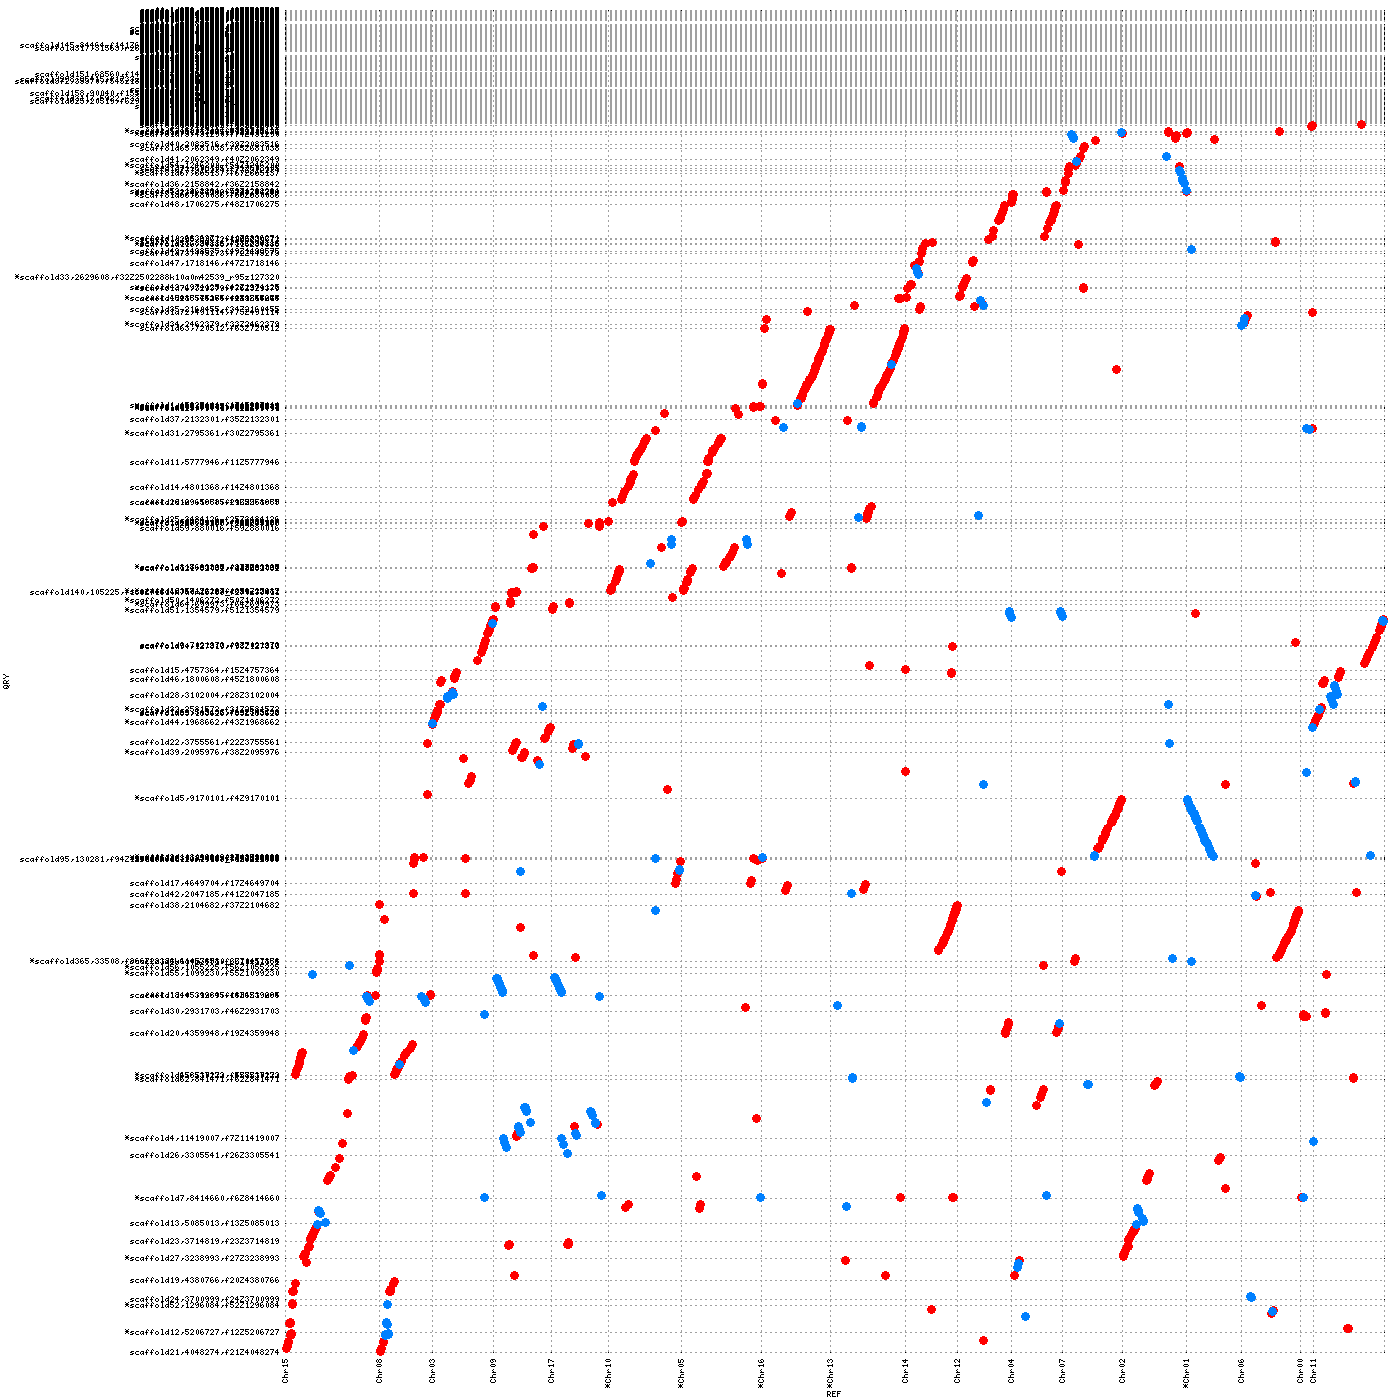

In [29]:
cat $WORKDIR/scaffolds_763.i70.l5k.graph.png | display

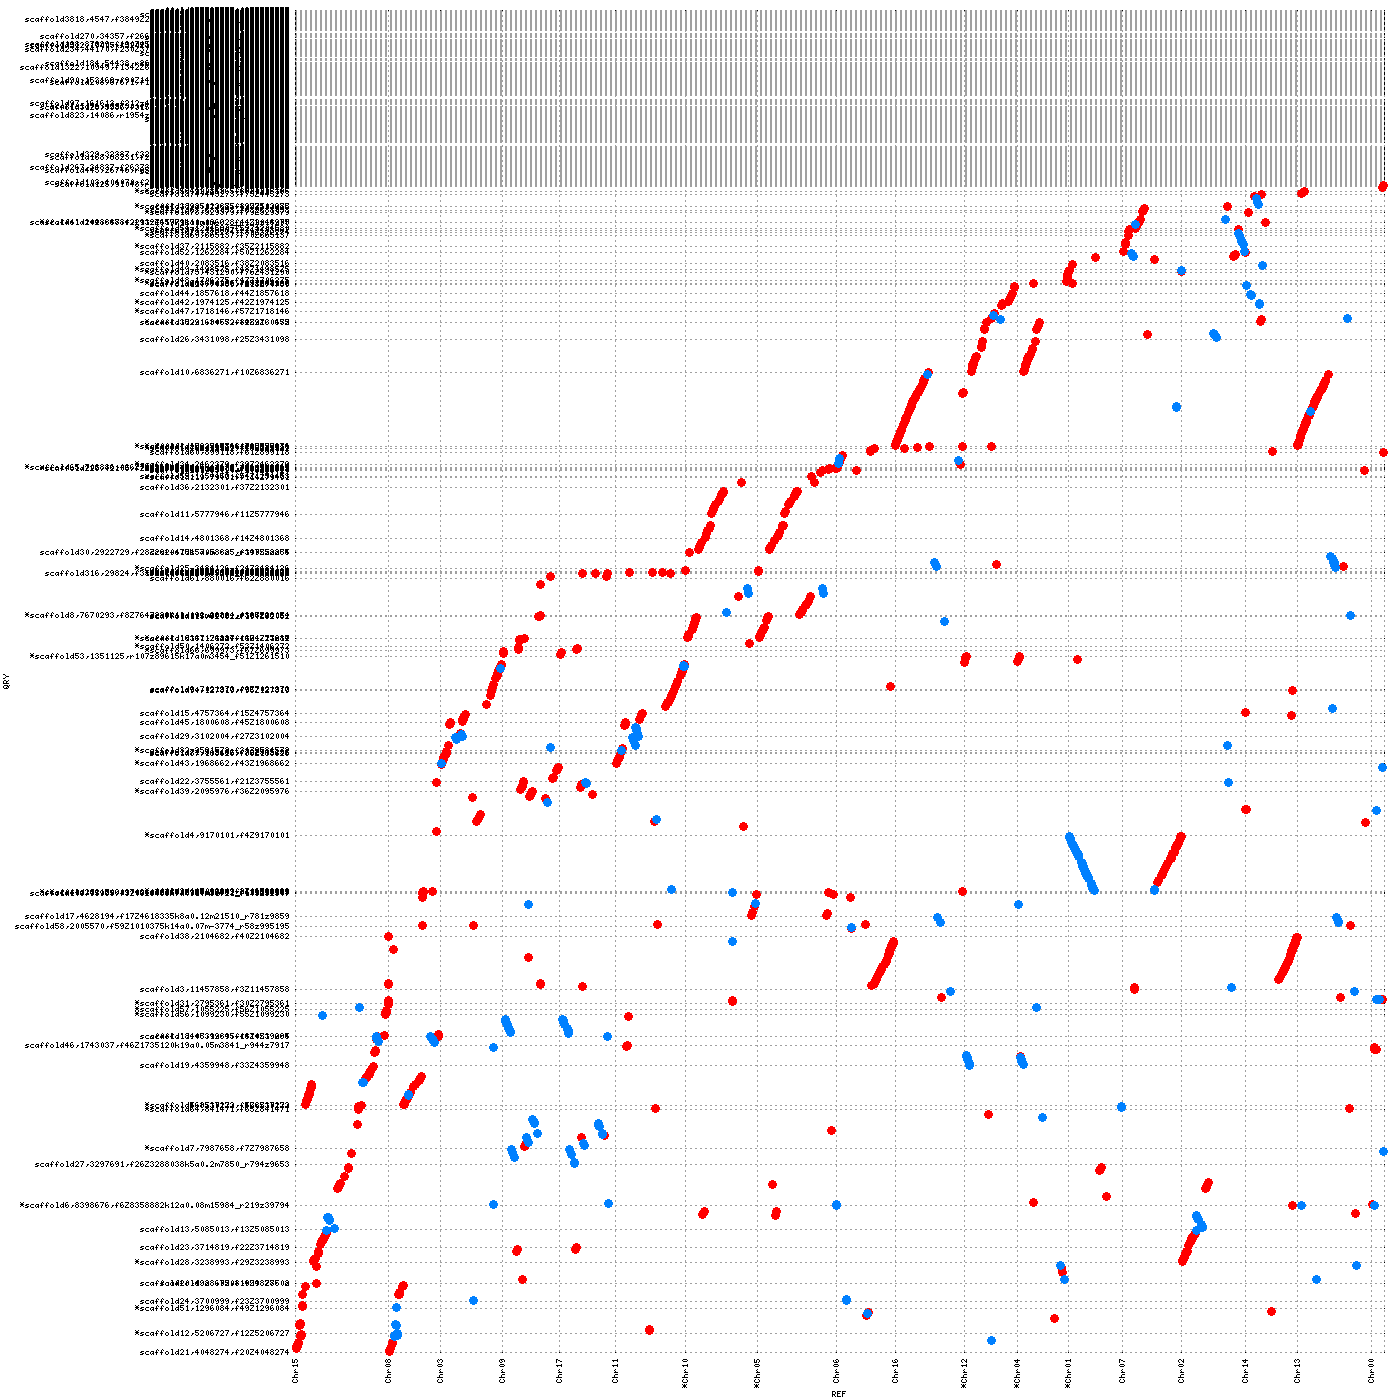

In [13]:
cat $WORKDIR/scaffolds_links_i8_fill.i70.l5k.graph.png | display

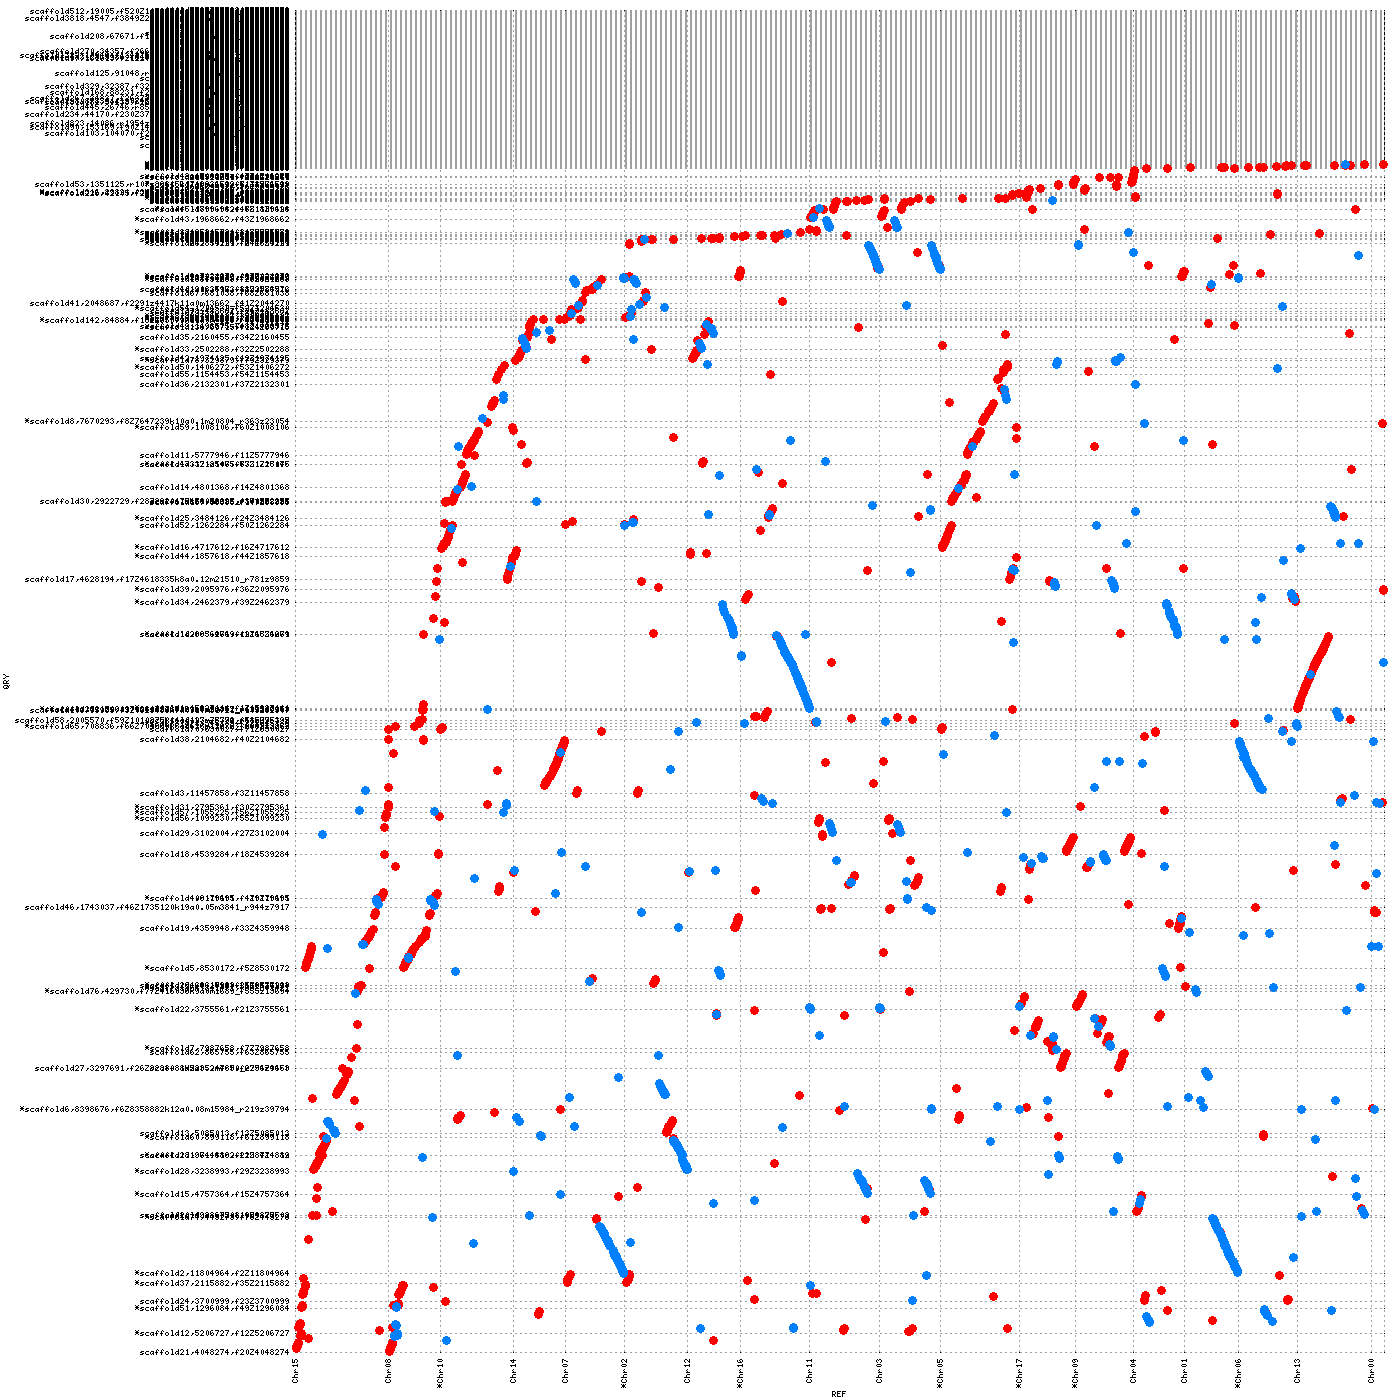

In [19]:
cat $WORKDIR/scaffolds_links_i8_fill.i70.l4k.graph.png | display

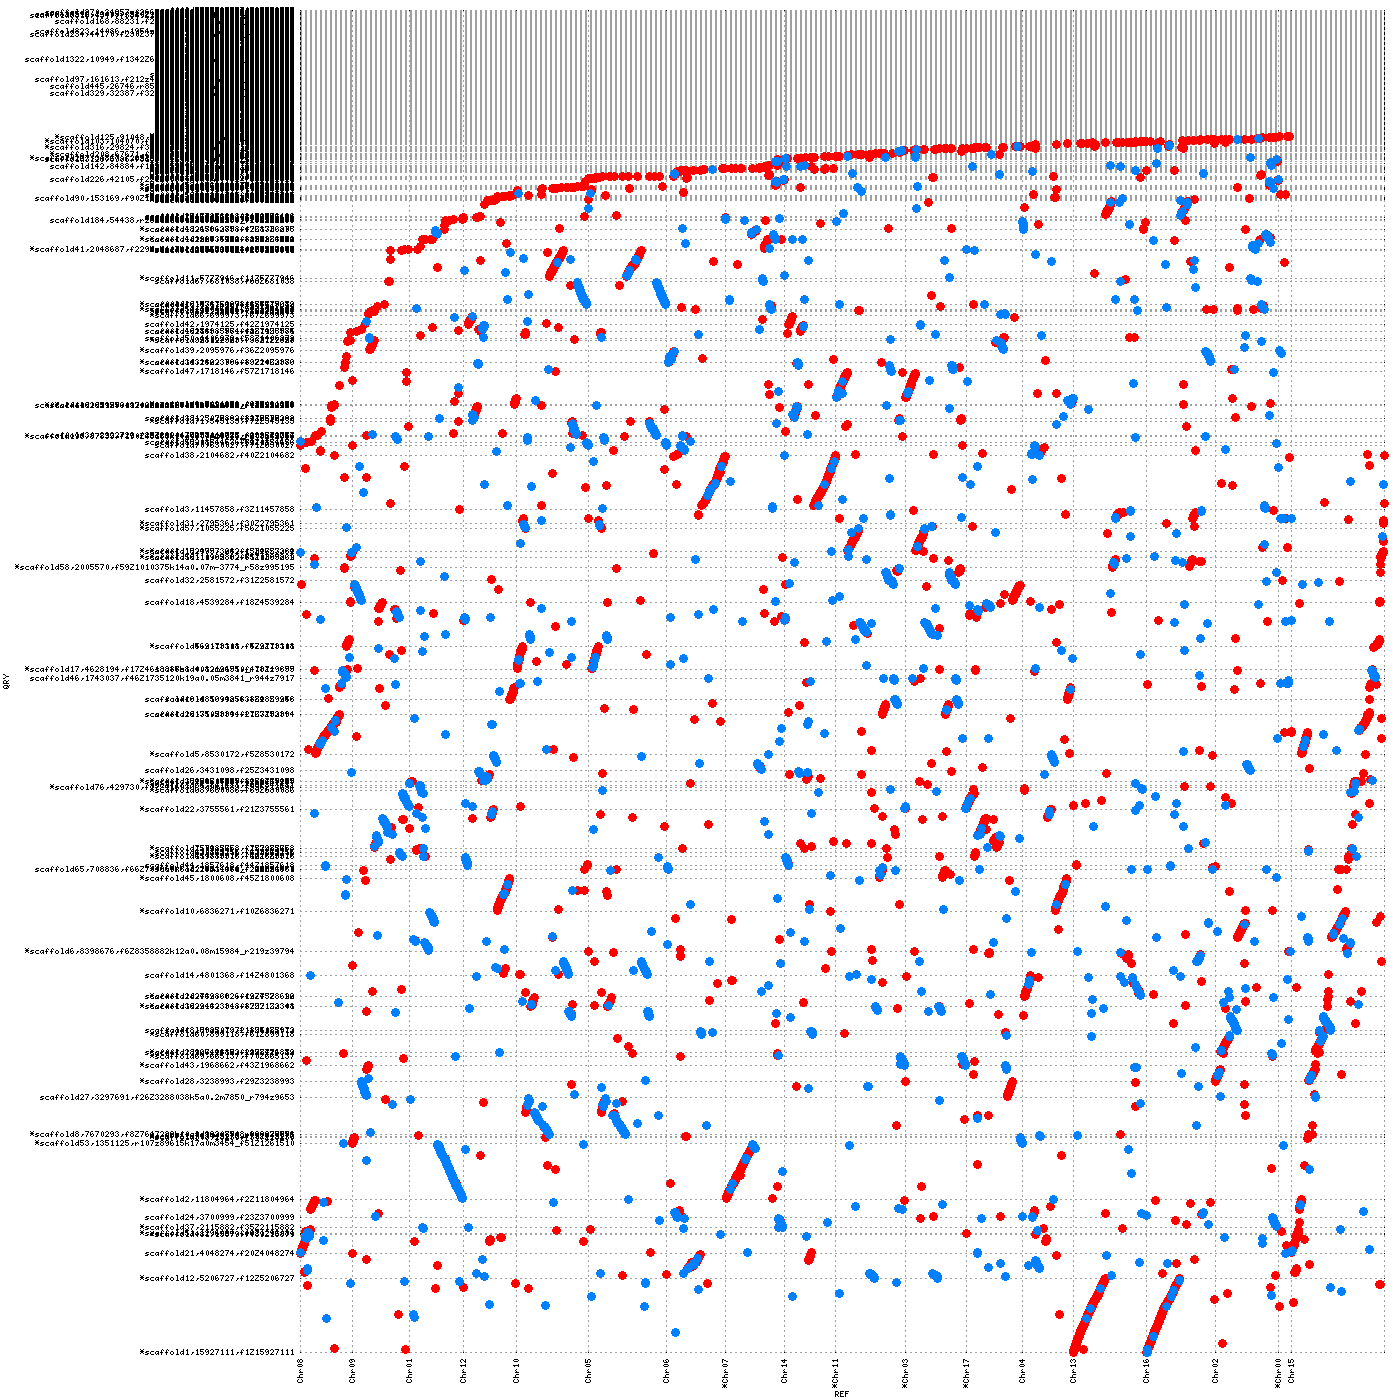

In [16]:
cat $WORKDIR/scaffolds_links_i8_fill.i70.l2k.graph.png | display

In [8]:
bsub -J graph \
-o $WORKDIR/graph_contig_chrs.i70.l10k.out \
-e $WORKDIR/graph_contig_chrs.i70.l10k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/contig_chrs.i70.l10k.delta \
-R $GENOME_PATH/$APPLE_ASSEMBLY \
-Q $CTG_CHR \
--filter \
--layout \
-p $WORKDIR/contig_chrs.i70.l10k.graph"

Job <255535> is submitted to default queue <lowpriority>.


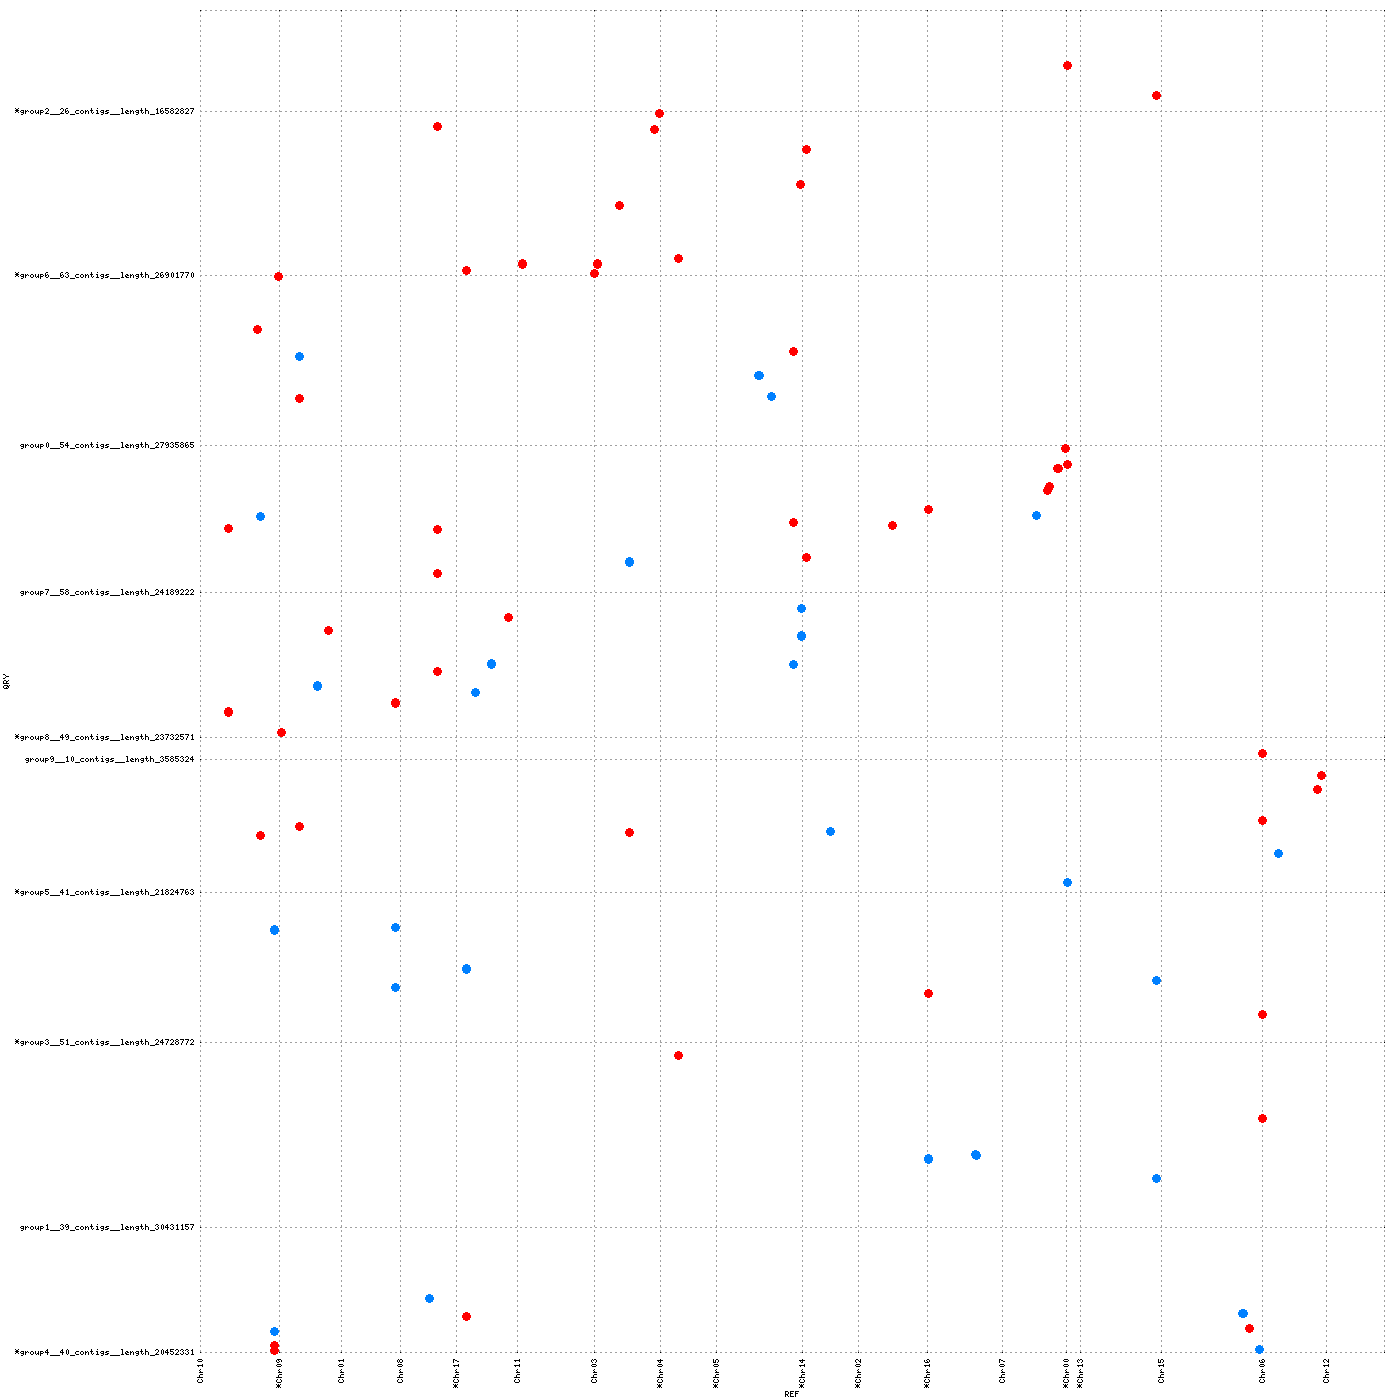

In [9]:
cat $WORKDIR/contig_chrs.i70.l10k.graph.png | display

In [11]:
bsub -J graph \
-o $WORKDIR/graph_contig_chrs.i70.l5k.out \
-e $WORKDIR/graph_contig_chrs.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/contig_chrs.i70.l5k.delta \
-R $GENOME_PATH/$APPLE_ASSEMBLY \
-Q $CTG_CHR \
--filter \
--layout \
-p $WORKDIR/contig_chrs.i70.l5k.graph"

Job <255971> is submitted to default queue <lowpriority>.


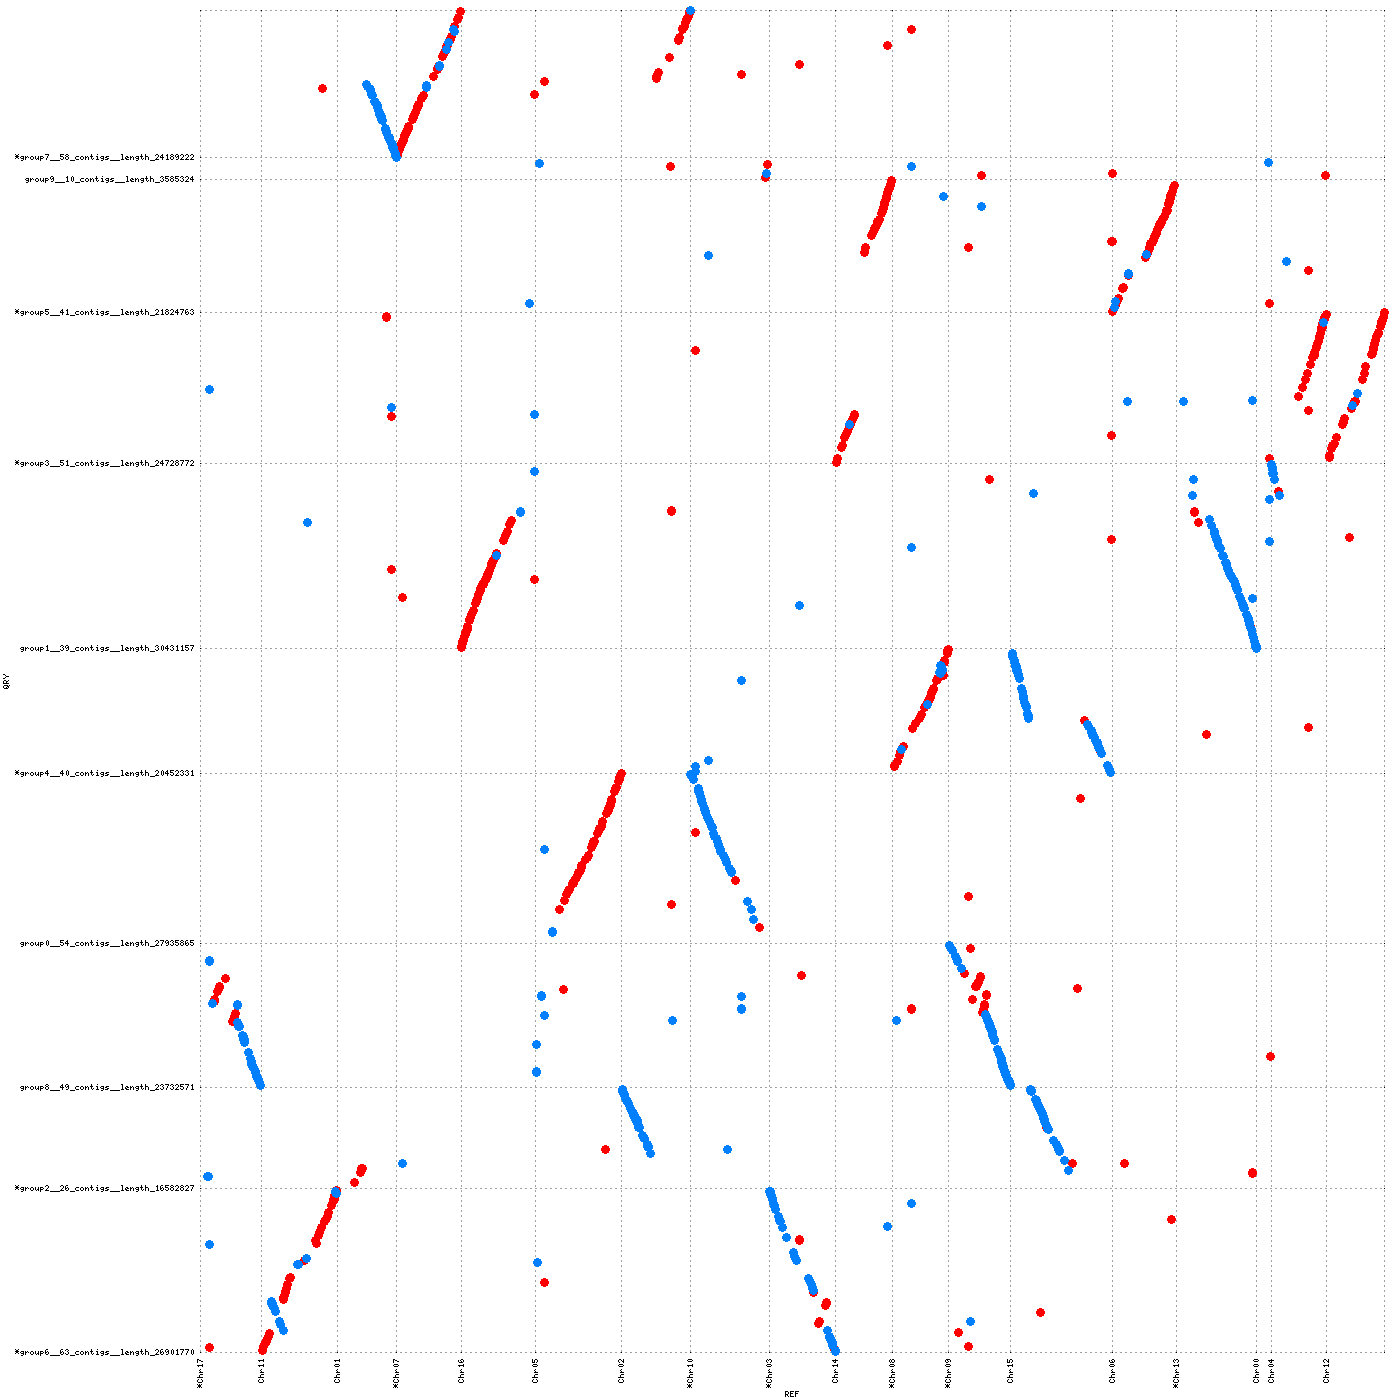

In [12]:
cat $WORKDIR/contig_chrs.i70.l5k.graph.png | display

In [7]:
bsub -J graph \
-o $WORKDIR/graph_ragoo_chrs.i70.l5k.out \
-e $WORKDIR/graph_ragoo_chrs.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/ragoo_chrs.i70.l5k.delta \
-R $GENOME_PATH/$APPLE_ASSEMBLY \
-Q $RAGOO_CHR_V1 \
--filter \
--layout \
-p $WORKDIR/ragoo_chrs.i70.l5k.graph"

Job <269214> is submitted to default queue <lowpriority>.


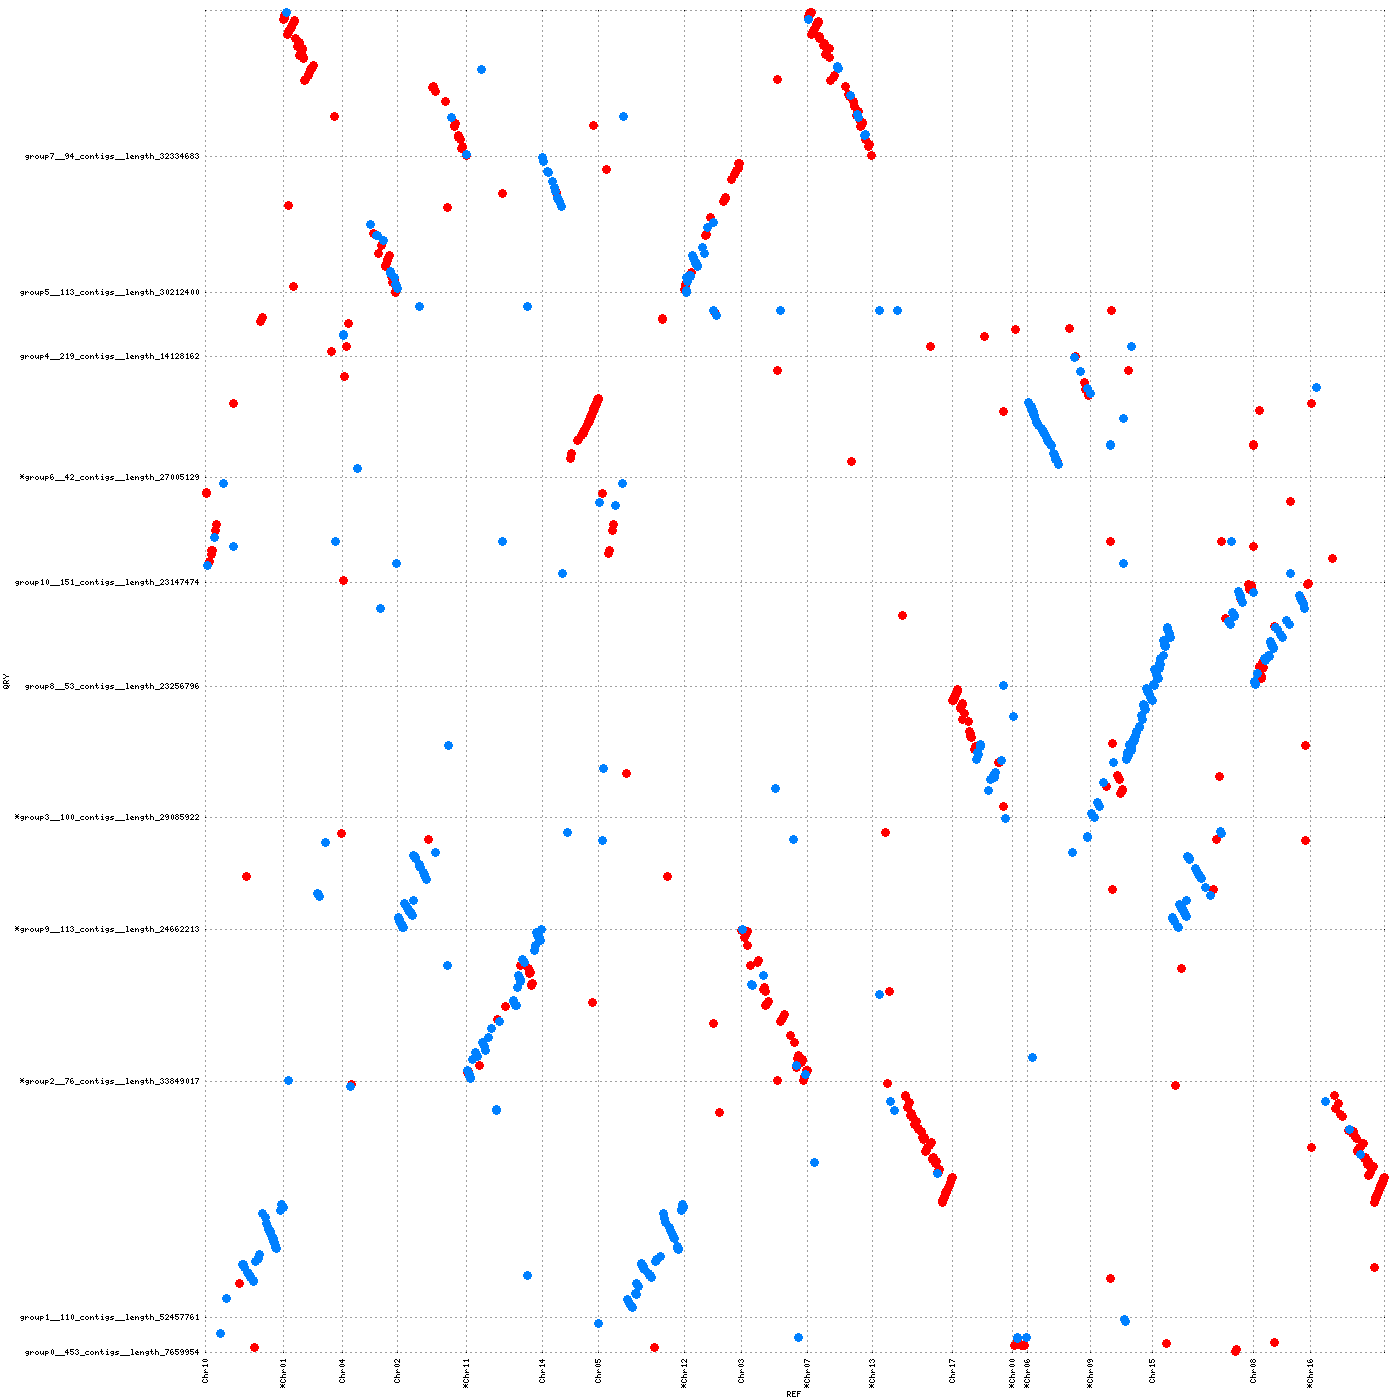

In [8]:
cat $WORKDIR/ragoo_chrs.i70.l5k.graph.png | display

In [32]:
bsub -J graph \
-o $WORKDIR/graph_ragoo_chrs_revcompl.i70.l5k.out \
-e $WORKDIR/graph_ragoo_chrs_revcompl.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/ragoo_chrs_revcompl.i70.l5k.delta \
-R $GENOME_PATH/$APPLE_ASSEMBLY \
-Q $RAGOO_CHR_V1_REVCOMPL \
--filter \
--layout \
-p $WORKDIR/ragoo_chrs_revcompl.i70.l5k.graph"

Job <295051> is submitted to default queue <lowpriority>.


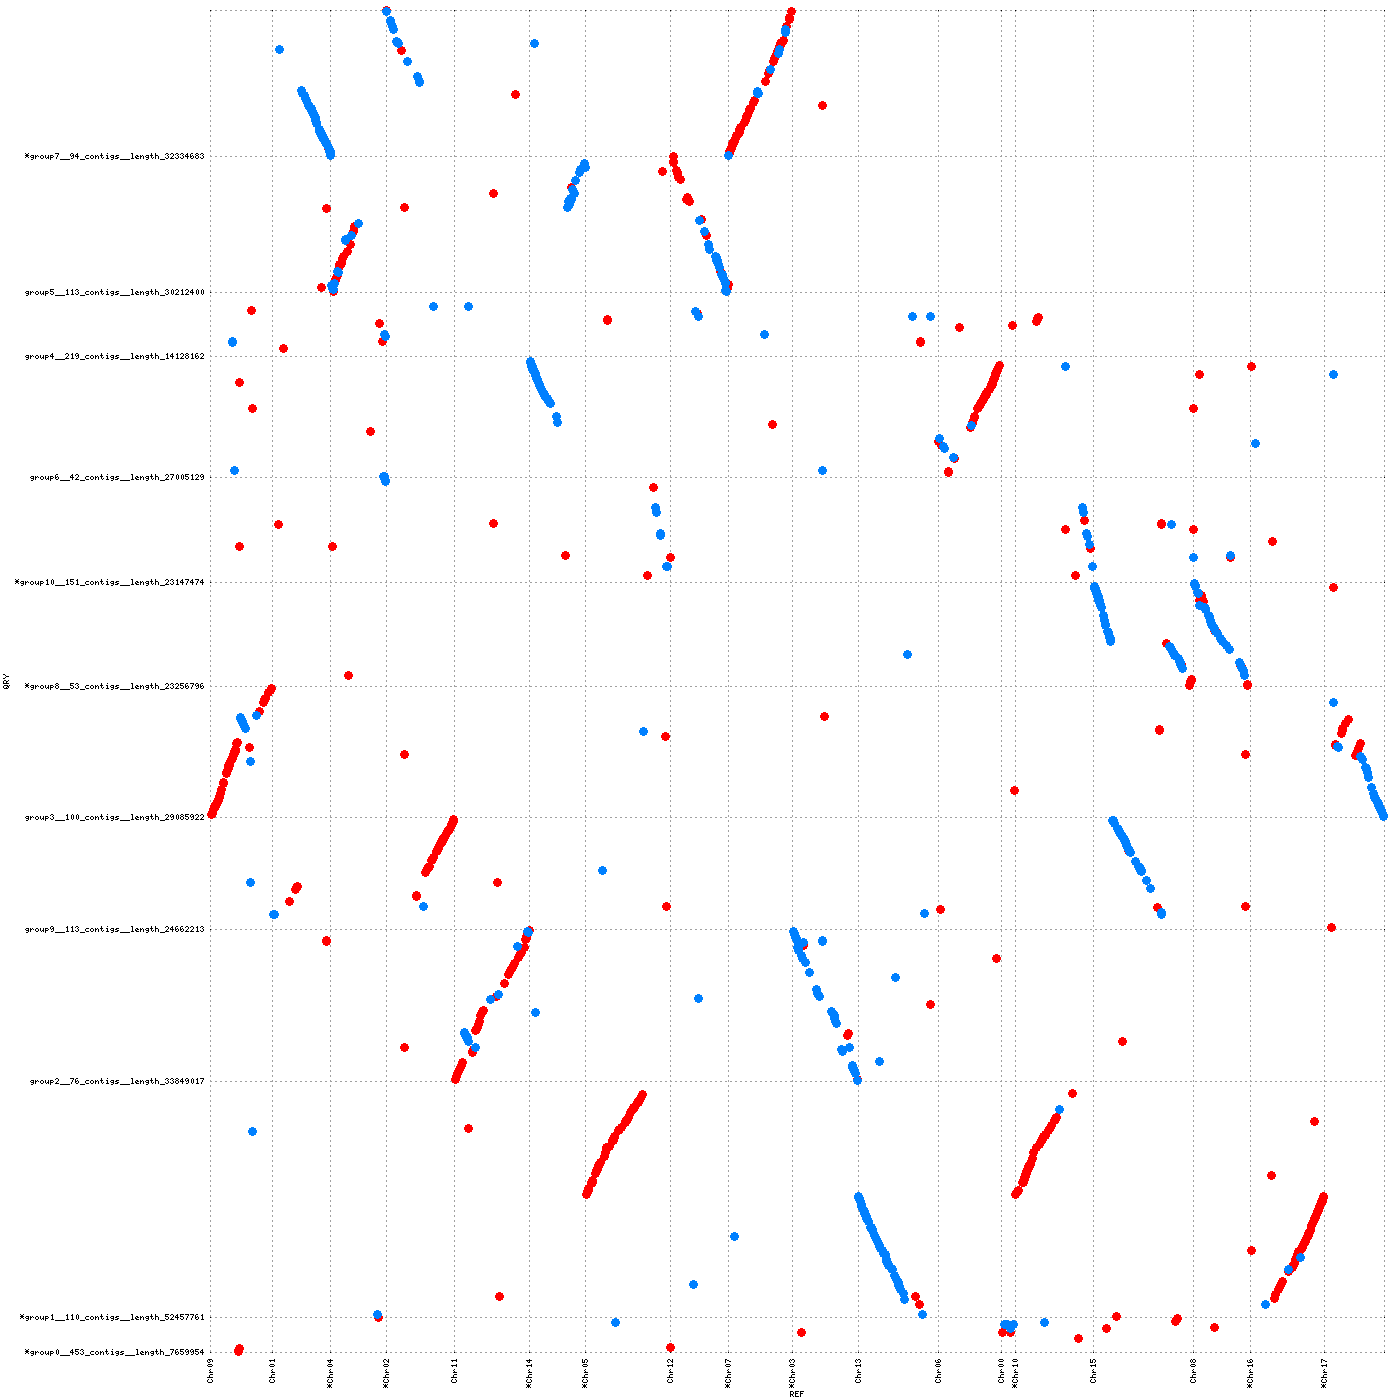

In [33]:
cat $WORKDIR/ragoo_chrs_revcompl.i70.l5k.graph.png | display

In [9]:
bsub -J graph \
-o $WORKDIR/graph_ragoo_chrs_v2.i70.l5k.out \
-e $WORKDIR/graph_ragoo_chrs_v2.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/ragoo_chrs_v2.i70.l5k.delta \
-R $GENOME_PATH/$APPLE_ASSEMBLY \
-Q $RAGOO_CHR_V2 \
--filter \
--layout \
-p $WORKDIR/ragoo_chrs_v2.i70.l5k.graph"

Job <294970> is submitted to default queue <lowpriority>.


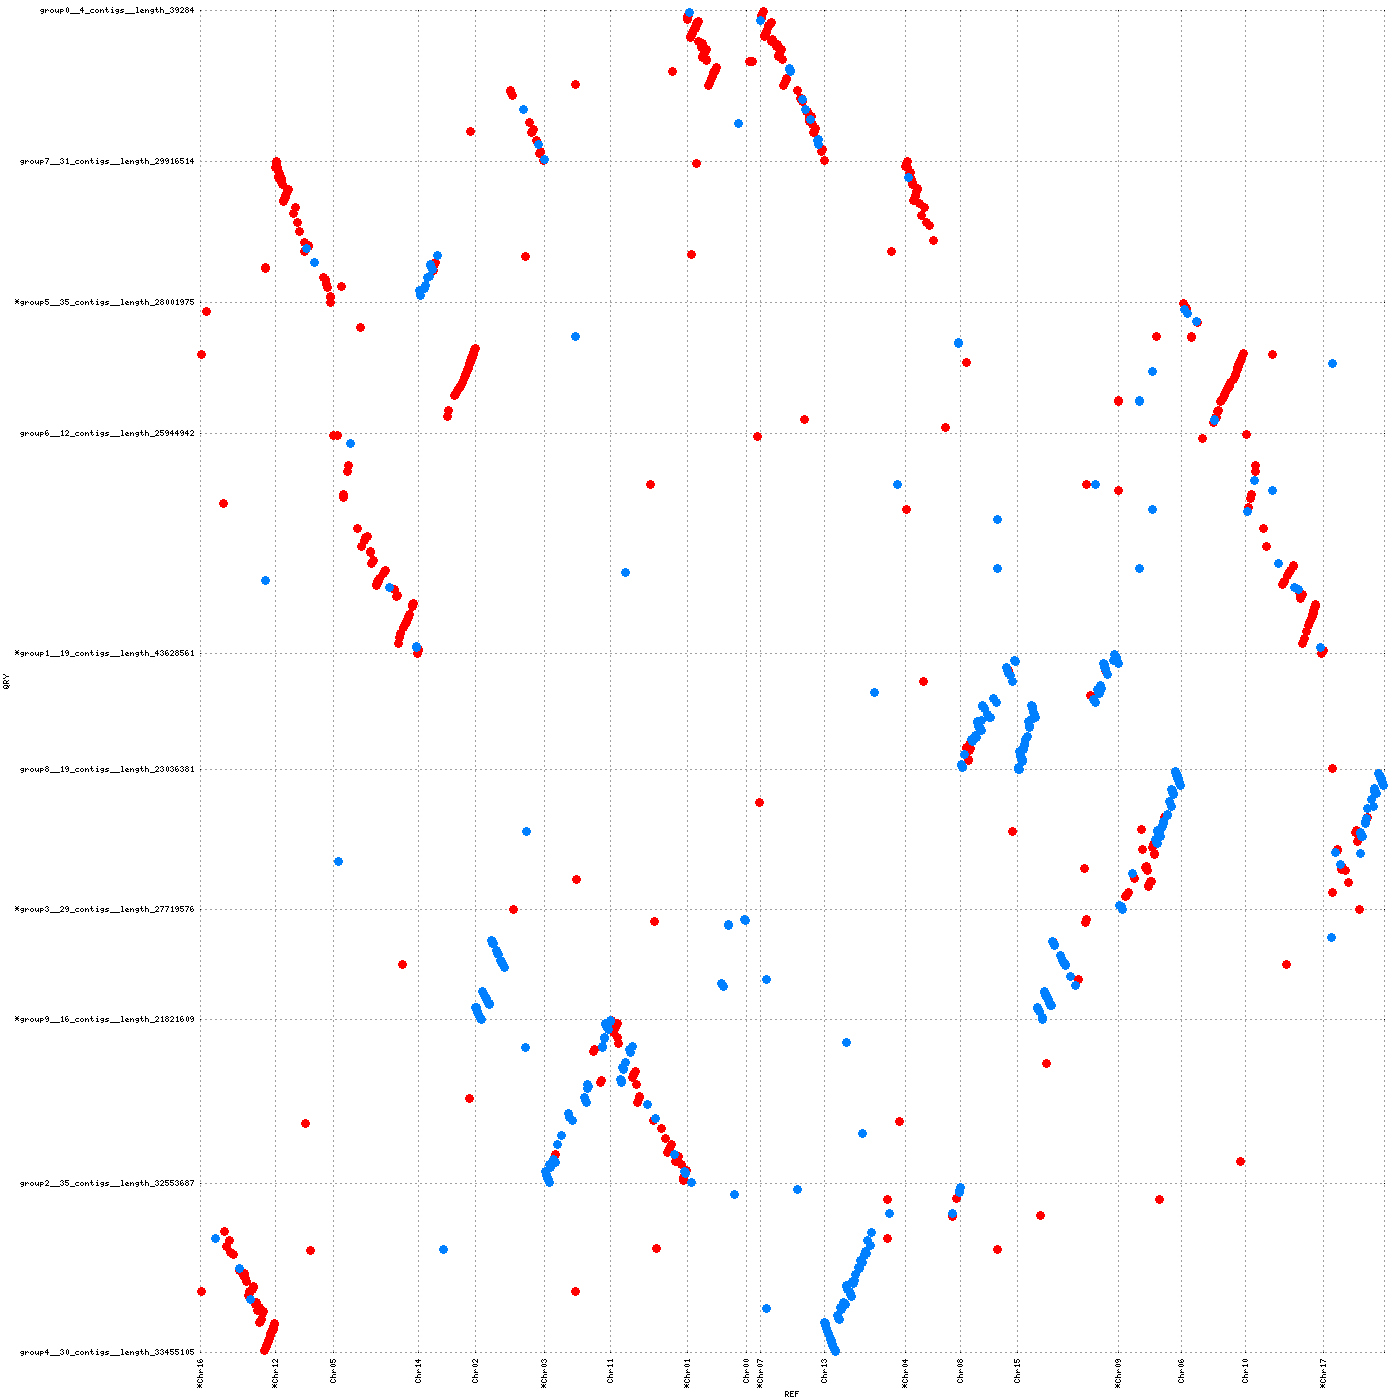

In [10]:
cat $WORKDIR/ragoo_chrs_v2.i70.l5k.graph.png | display

In [26]:
bsub -J graph \
-o $WORKDIR/graph_ragoo_chrs_v3.i70.l5k.out \
-e $WORKDIR/graph_ragoo_chrs_v3.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/ragoo_chrs_v3.i70.l5k.delta \
-R $GENOME_PATH/$APPLE_ASSEMBLY \
-Q $RAGOO_CHR_V3 \
--filter \
--layout \
-p $WORKDIR/ragoo_chrs_v3.i70.l5k.graph"

Job <295048> is submitted to default queue <lowpriority>.


In [35]:
pwd

/powerplant/workspace/hraczw/github/GA/Gillenia_genome


In [36]:
$WORKDIR

bash: 006.SyntenyAnalysis: command not found


: 127

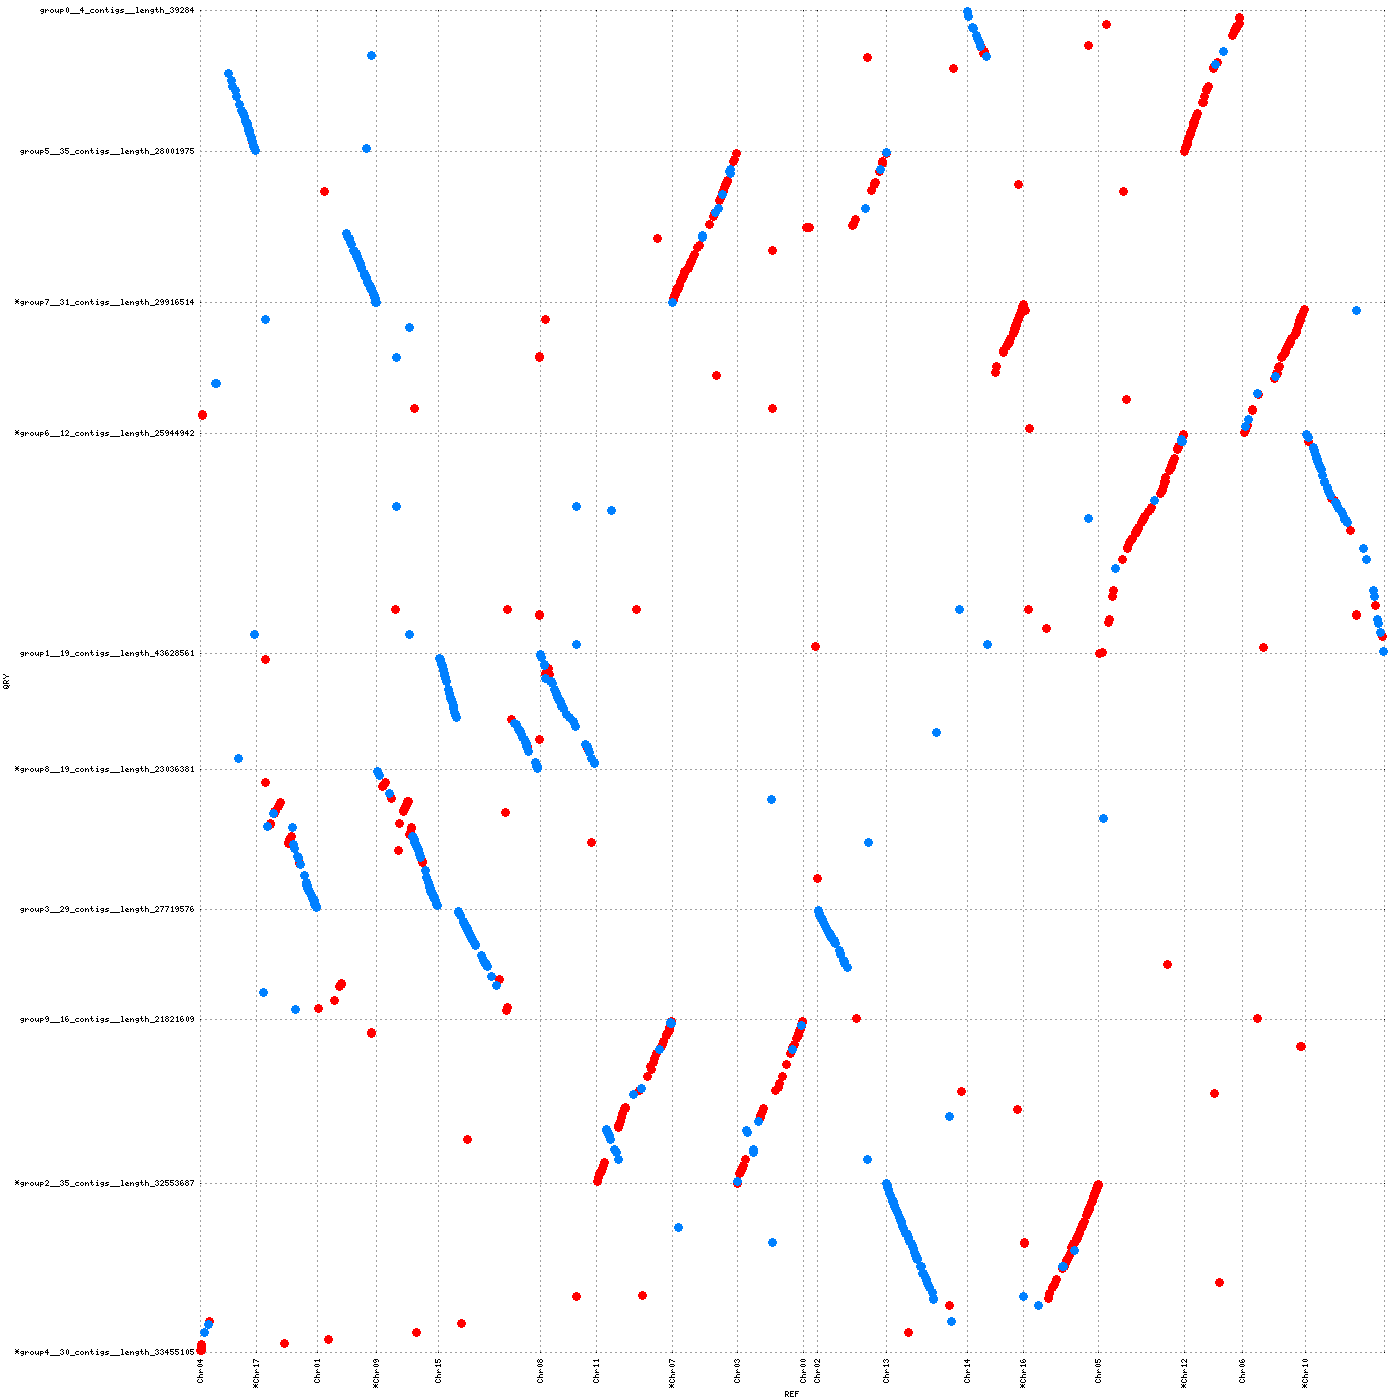

In [27]:
cat $WORKDIR/ragoo_chrs_v3.i70.l5k.graph.png | display

In [20]:
bsub -J graph \
-o $WORKDIR/dnadiff_ragoo_chrs_v2.i70.l5k.out \
-e $WORKDIR/dnadiff_ragoo_chrs_v2.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/dnadiff \
-d $WORKDIR/ragoo_chrs_v2.delta"

Job <295017> is submitted to default queue <lowpriority>.


In [18]:
bsub -J dnadiff \
-o $WORKDIR/graph_chr_compare.i70.l5k.out \
-e $WORKDIR/graph_chr_compare.i70.l5k.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/chr_compare.i70.l5k.delta \
-R $RAGOO_CHR_V2 \
-Q $CTG_CHR \
--filter \
--layout \
-p $WORKDIR/chr_compare.i70.l5k.graph"

Job <295016> is submitted to default queue <lowpriority>.


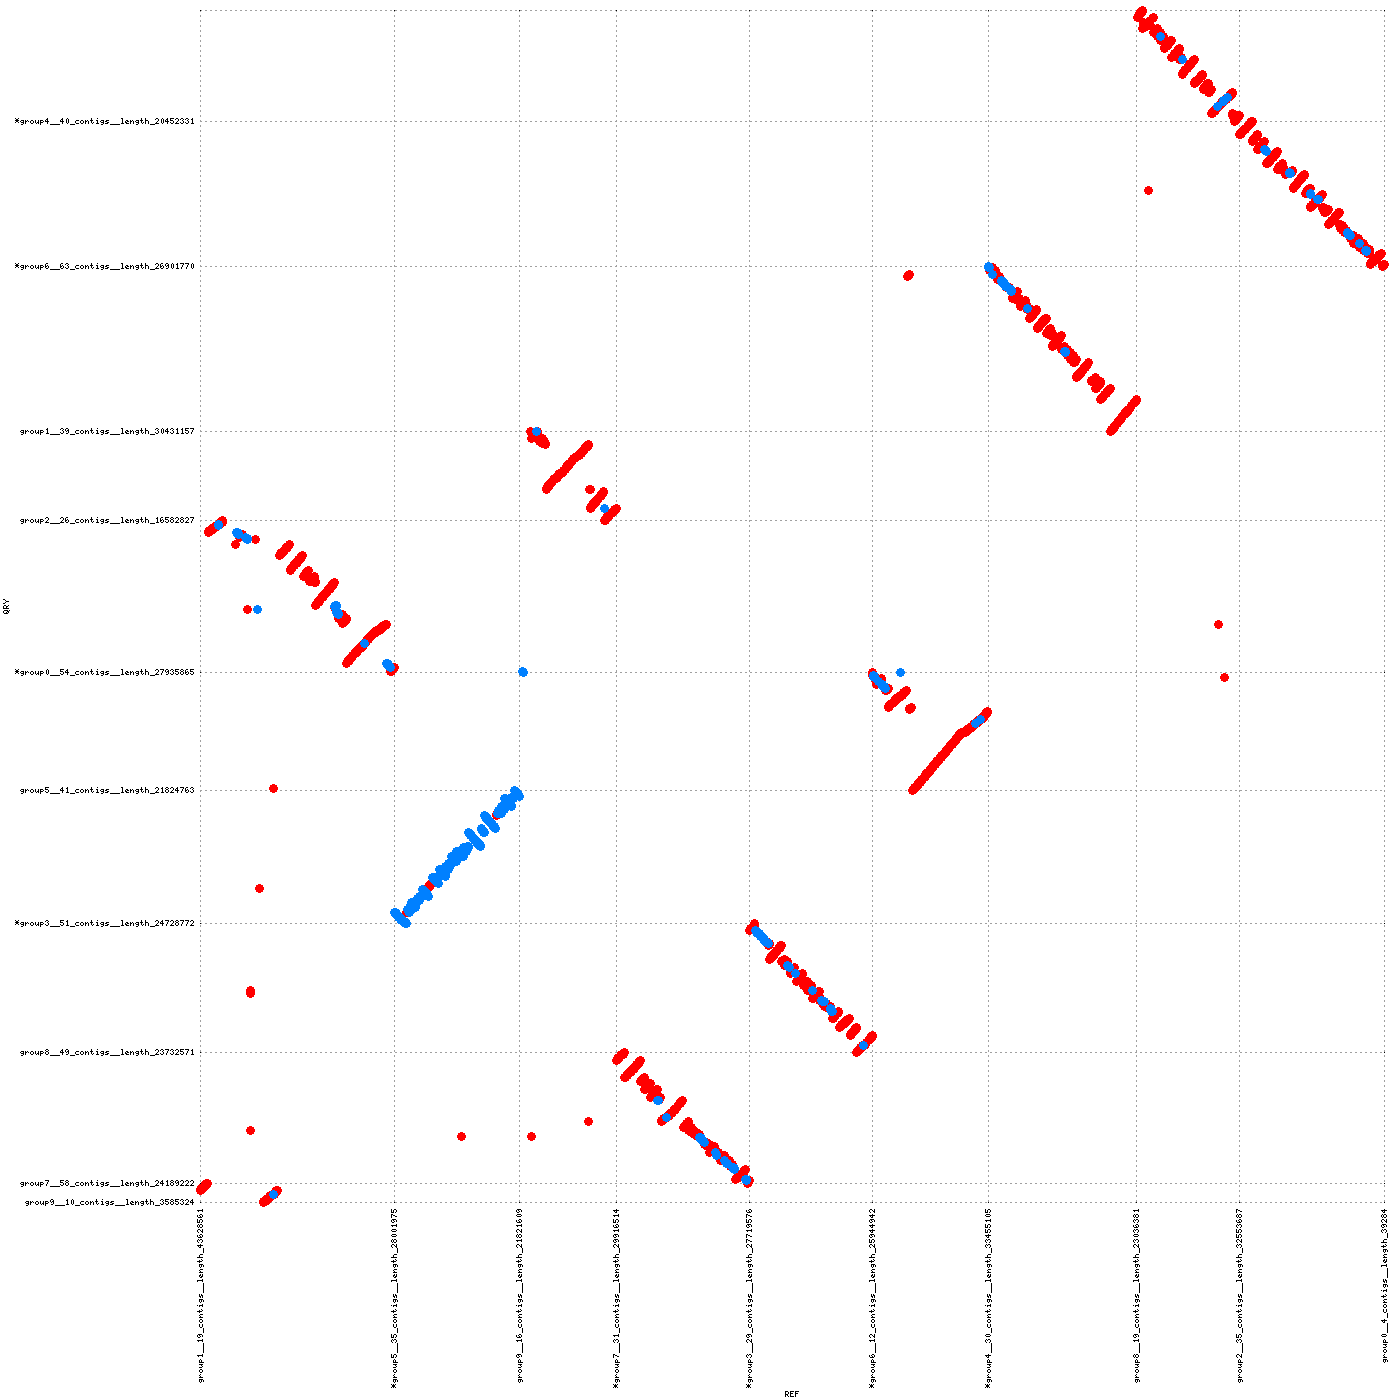

In [19]:
cat $WORKDIR/chr_compare.i70.l5k.graph.png | display

### pear

In [13]:
bsub -J graph \
-o $WORKDIR/graph.i70.l5k.links.pear.out \
-e $WORKDIR/graph.i70.l5k.links.pear.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/scaffolds_links.i70.l5k.pear.delta \
-R $GENOME_PATH/$PEAR_ASSEMBLY \
-Q $SCAFFOLDS_LINKS \
--filter \
--layout \
-p $WORKDIR/scaffolds_links.i70.l5k.pear.graph"

Job <211805> is submitted to default queue <lowpriority>.


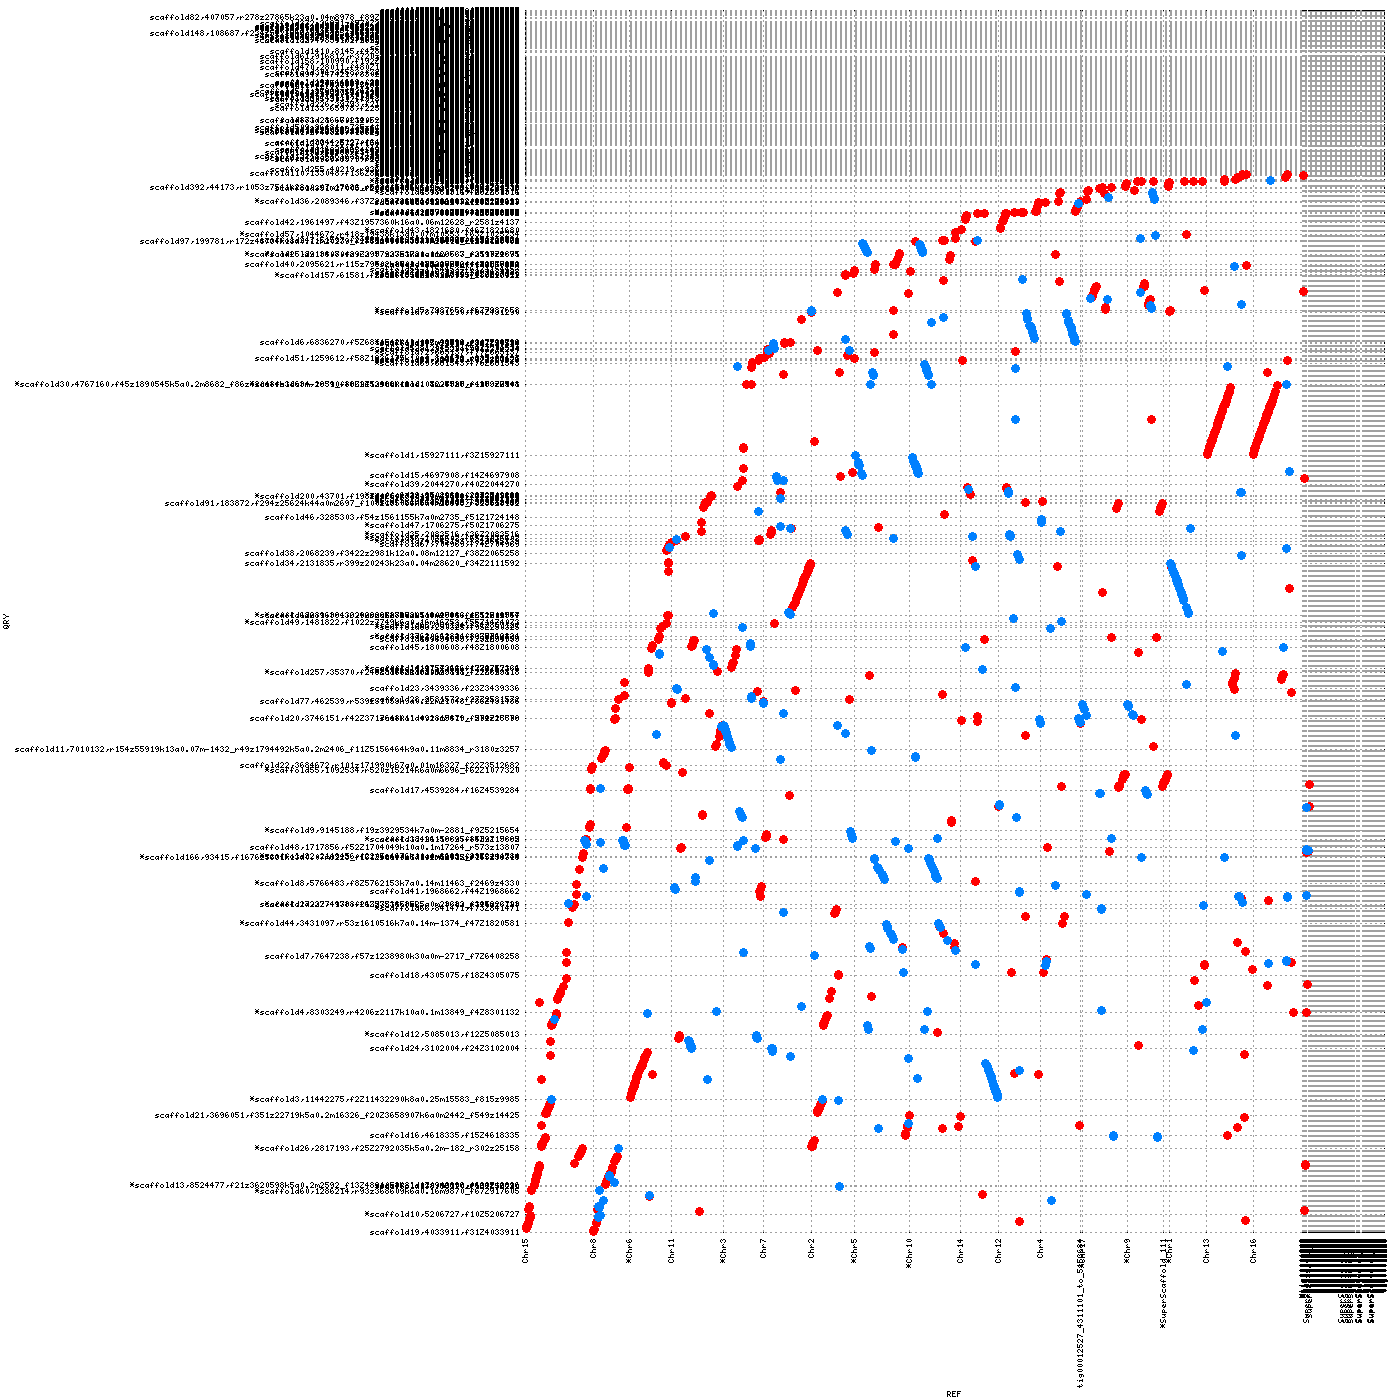

In [14]:
cat $WORKDIR/scaffolds_links.i70.l5k.pear.graph.png | display

* Not sure why it only has half cake, double-checking script
* **NOTE**: the problem is in the reference, chromosome 0-9 should be Chr00-Chr09 not Chr1-9...

### Peach

In [15]:
bsub -J graph \
-o $WORKDIR/graph.links.i70.l5k.peach.out \
-e $WORKDIR/graph.links.i70.l5k.peach.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/scaffolds_links.i70.l5k.peach.delta \
-R $GENOME_PATH/$PEACH_ASSEMBLY \
-Q $SCAFFOLDS_LINKS \
--filter \
--layout \
-p $WORKDIR/scaffolds_links.i70.l5k.peach.graph"

Job <211806> is submitted to default queue <lowpriority>.


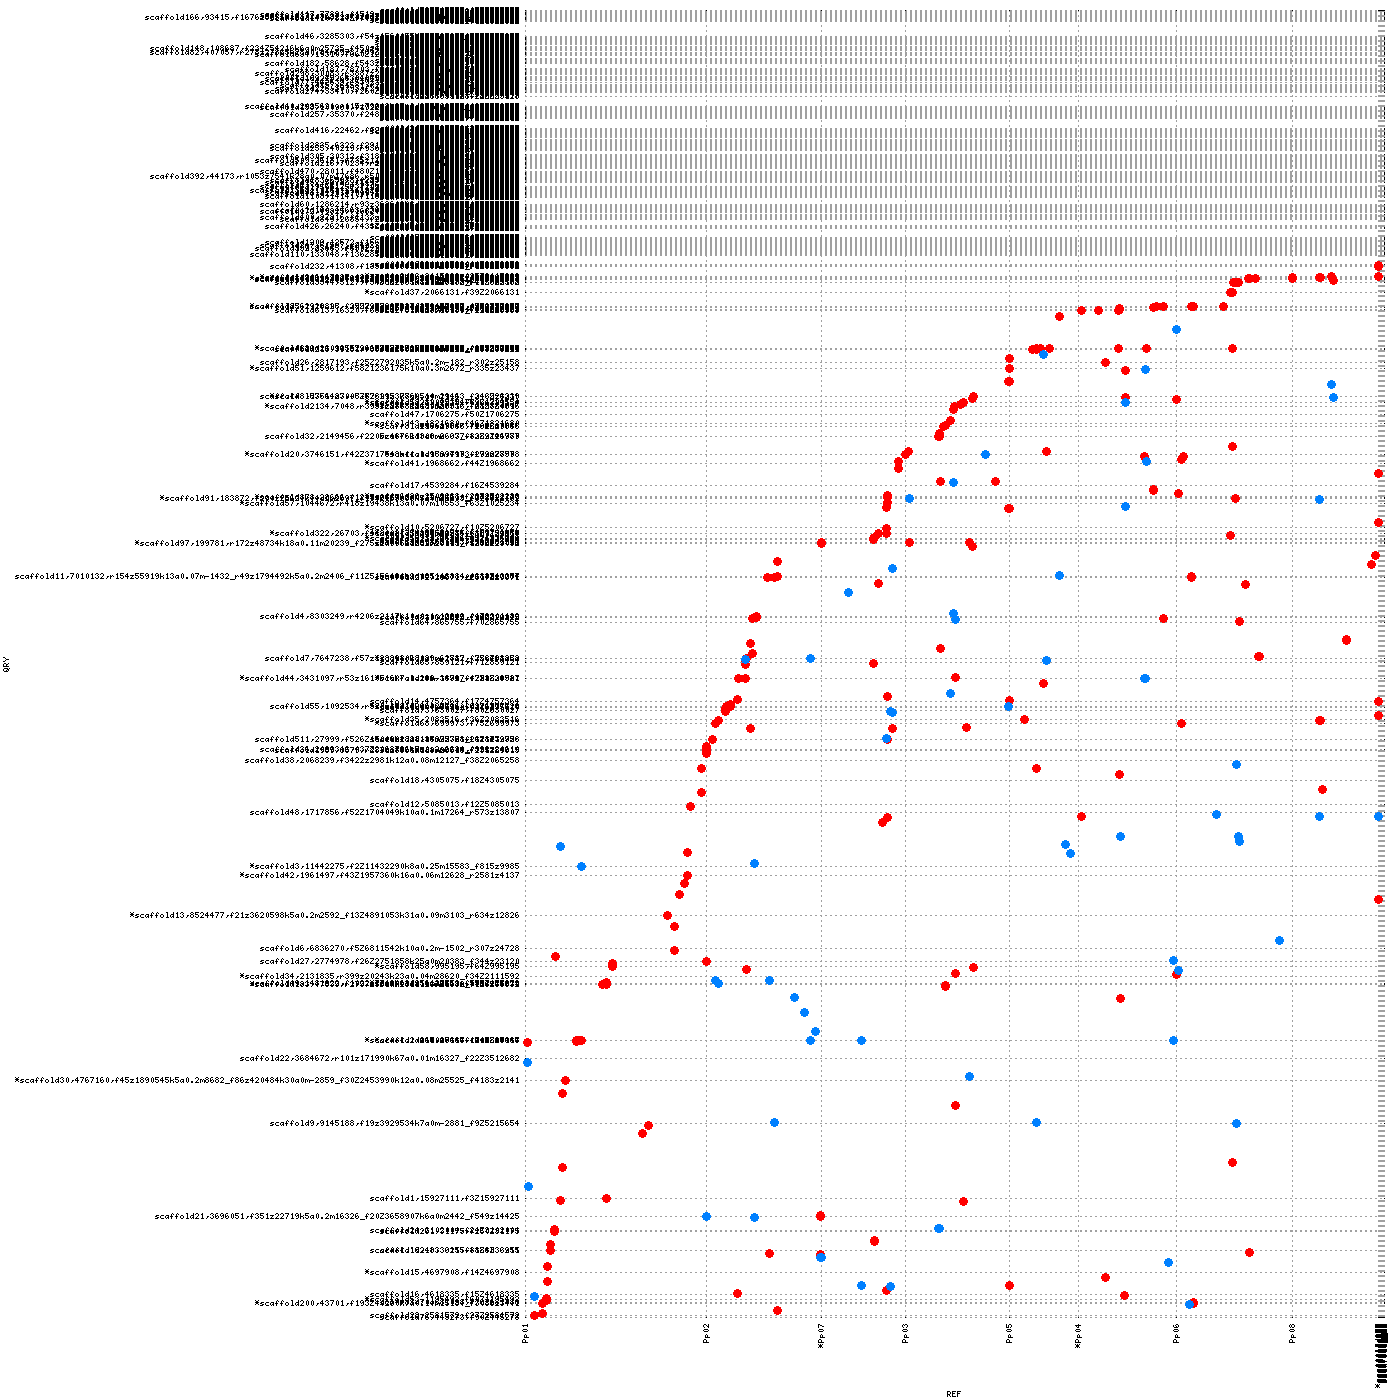

In [16]:
cat $WORKDIR/scaffolds_links.i70.l5k.peach.graph.png | display

In [17]:
bsub -J graph \
-o $WORKDIR/graph.links.i50.l2k.peach.out \
-e $WORKDIR/graph.links.i50.l2k.peach.err \
"/workspace/hrarnc/software/mummer-4.0.0beta2/bin/mummerplot \
--large \
--png \
$WORKDIR/scaffolds_links.i50.l2k.peach.delta \
-R $GENOME_PATH/$PEACH_ASSEMBLY \
-Q $SCAFFOLDS_LINKS \
--filter \
--layout \
-p $WORKDIR/scaffolds_links.i50.l2k.peach.graph"

Job <211807> is submitted to default queue <lowpriority>.


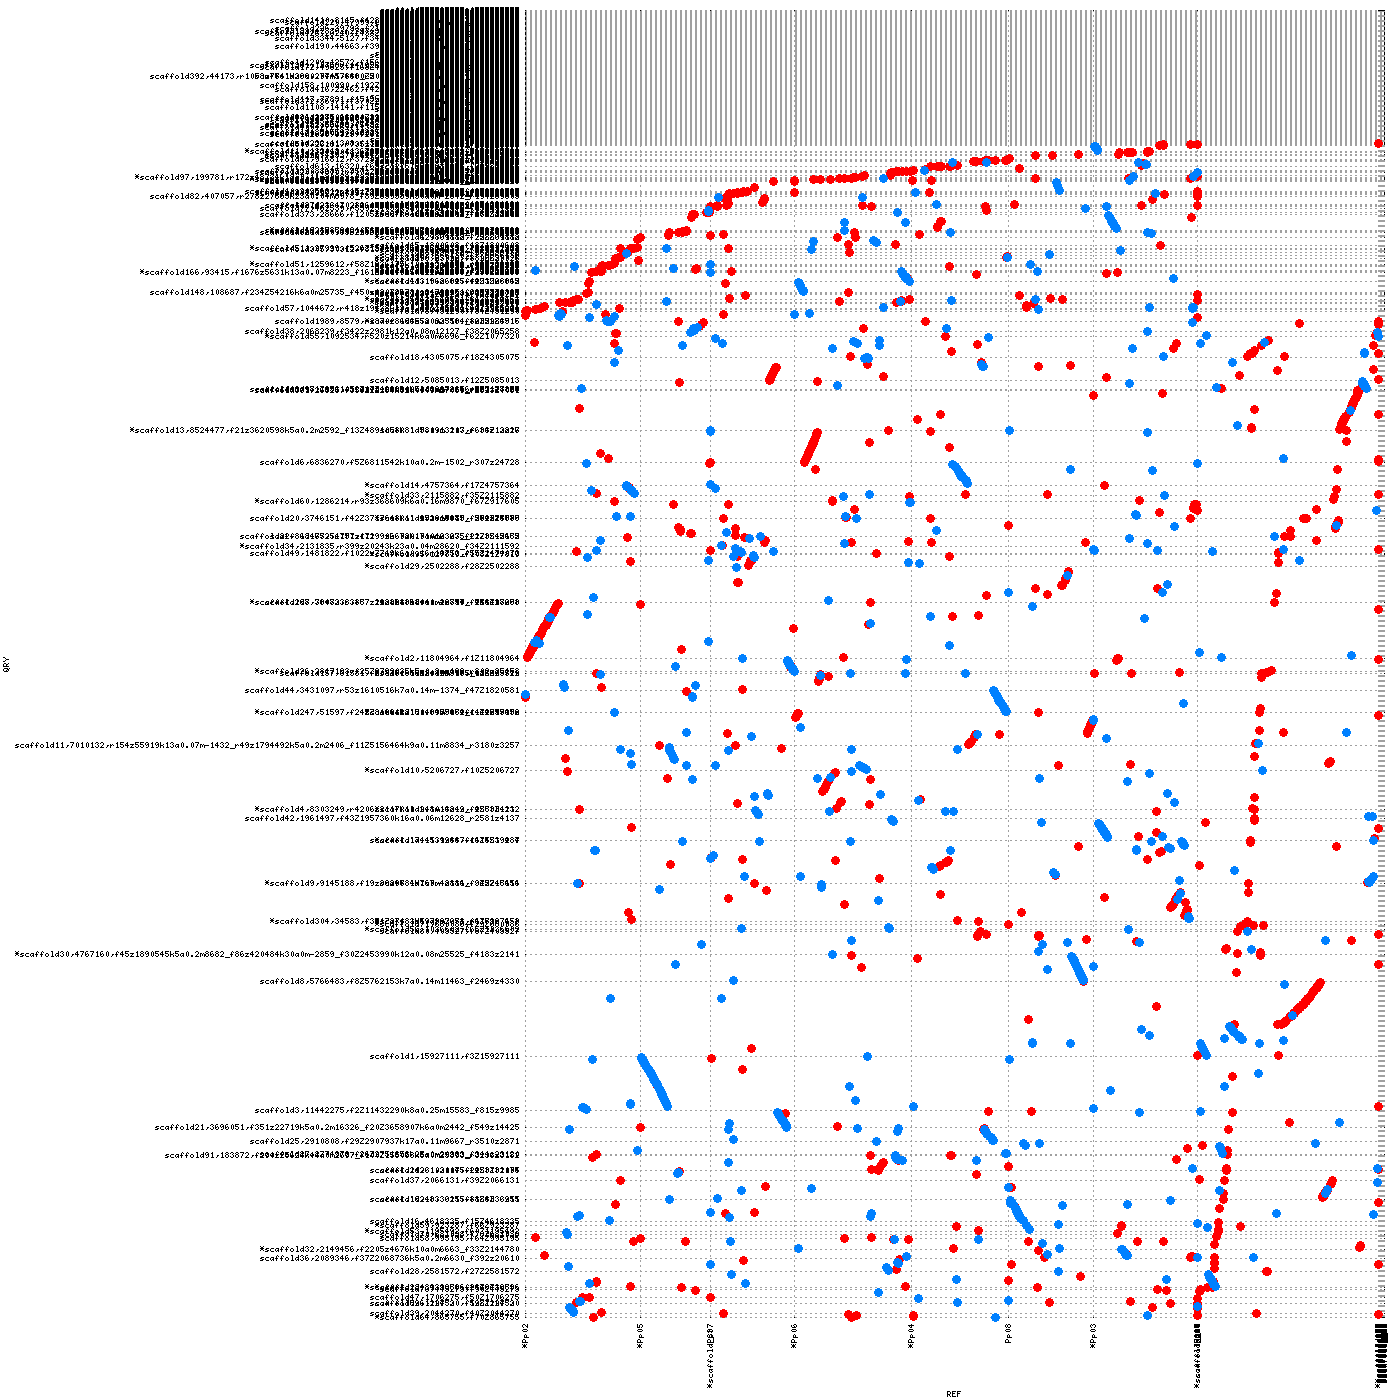

In [18]:
cat $WORKDIR/scaffolds_links.i50.l2k.peach.graph.png | display